<a href="https://colab.research.google.com/github/nprimavera/Financial-Models/blob/main/Model_to_Calculate_Stock_Returns.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# -------------------------------
# Code to calculate stock returns
# -------------------------------

# ---------------
# Import packages
# ---------------
import yfinance as yf                     # Download stock data from Yahoo Finance
import pandas as pd                       # Pandas library for data manipulation
import matplotlib.pyplot as plt           # Plotting
from datetime import datetime, timedelta  # For handling date ranges

# ---------------------------------------------------------
# Function to calculate returns over different time periods
# ---------------------------------------------------------
def calculate_returns(df, current_price):

    return_periods = {  # Define return periods (label: # of days ago)
        "1 Week": 7,
        "1 Month": 30,
        "3 Months": 90,
        "6 Months": 180,
        "1 Year": 365,
        "5 Years": 5 * 365,
    }

    print("\nReturns:")

    for label, days in return_periods.items():
        past_date = df.index.max() - timedelta(days=days)               # Calculate the target past date from the most recent date in the DataFrame
        past_data = df[df.index <= past_date]                           # Get the closest data before or equal to the target date
        if not past_data.empty:                                         # Check if there is data available (not empty)
            #past_price = past_data['Close'].iloc[-1]
            past_price = float(past_data['Close'].iloc[-1])             # Extract the past closing price (most recent value before target date)
            returns = (current_price - past_price) / past_price * 100   # Calculate percent return: (Current - Past) / Past * 100
            print(f"{label} Return: {returns:.2f}%")
        else:
            print(f"{label} Return: Not enough data.")

# -----------------------------------------------------------------
# Function to plot 50-day and 200-day SMAs (simple moving averages)
# -----------------------------------------------------------------
def plot_sma(df, ticker):

    # Calculate the SMAs
    df['SMA_50'] = df['Close'].rolling(window=50).mean()    # 50 day
    df['SMA_200'] = df['Close'].rolling(window=200).mean()  # 200 day

    # Plot
    plt.figure(figsize=(12, 6))
    plt.plot(df.index, df['Close'], label='Close Price', alpha=0.5)
    plt.plot(df.index, df['SMA_50'], label='50-Day SMA', linewidth=2)
    plt.plot(df.index, df['SMA_200'], label='200-Day SMA', linewidth=2)
    plt.title(f"{ticker} - 50-Day vs 200-Day SMA")
    plt.xlabel("Date (year)")
    plt.ylabel("Price ($)")
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()

# -------------------------------------------------------
# Main function to run analysis for a single stock ticker
# -------------------------------------------------------
def analyze_stock(ticker):

    # Define date range
    end = datetime.today()  # Today
    start = end - timedelta(days=5*365 + 200)  # Last 5 years + 200 days for SMA calculation buffer

    df = yf.download(ticker, start=start.strftime('%Y-%m-%d'), end=end.strftime('%Y-%m-%d'))  # DataFrame - download historical daily price data from Yahoo Finance

    # Check to make sure there is data
    if df.empty:
        print("No data found.")
        return

    print(f"\n\nAnalyzing: {ticker}")

    #current_price = df['Close'].iloc[-1]
    current_price = float(df['Close'].iloc[-1])     # Extract the most recent closing price and convert to float for calculations

    print(f"\nCurrent Price: ${current_price:.2f}")

    calculate_returns(df, current_price)  # Compute historical returns over standard periods

    plot_sma(df, ticker)  # Plot price with SMAs

/tmp/ipython-input-1-1790634752.py:71: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(ticker, start=start.strftime('%Y-%m-%d'), end=end.strftime('%Y-%m-%d'))  # DataFrame - download historical daily price data from Yahoo Finance
[*********************100%***********************]  1 of 1 completed
/tmp/ipython-input-1-1790634752.py:81: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  current_price = float(df['Close'].iloc[-1])     # Extract the most recent closing price and convert to float for calculations
/tmp/ipython-input-1-1790634752.py:34: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  past_price = float(past_data['Close'].iloc[-1])             # Extract the past closing price (most recent value before target date)




Analyzing: QQQ

Current Price: $561.26

Returns:
1 Week Return: 1.27%
1 Month Return: 6.22%
3 Months Return: 26.52%
6 Months Return: 7.86%
1 Year Return: 17.71%
5 Years Return: 122.80%


/tmp/ipython-input-1-1790634752.py:71: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(ticker, start=start.strftime('%Y-%m-%d'), end=end.strftime('%Y-%m-%d'))  # DataFrame - download historical daily price data from Yahoo Finance
[*********************100%***********************]  1 of 1 completed
/tmp/ipython-input-1-1790634752.py:81: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  current_price = float(df['Close'].iloc[-1])     # Extract the most recent closing price and convert to float for calculations
/tmp/ipython-input-1-1790634752.py:34: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  past_price = float(past_data['Close'].iloc[-1])             # Extract the past closing price (most recent value before target date)




Analyzing: VOO

Current Price: $576.92

Returns:
1 Week Return: 0.65%
1 Month Return: 5.36%
3 Months Return: 19.59%
6 Months Return: 5.69%
1 Year Return: 15.05%
5 Years Return: 110.27%


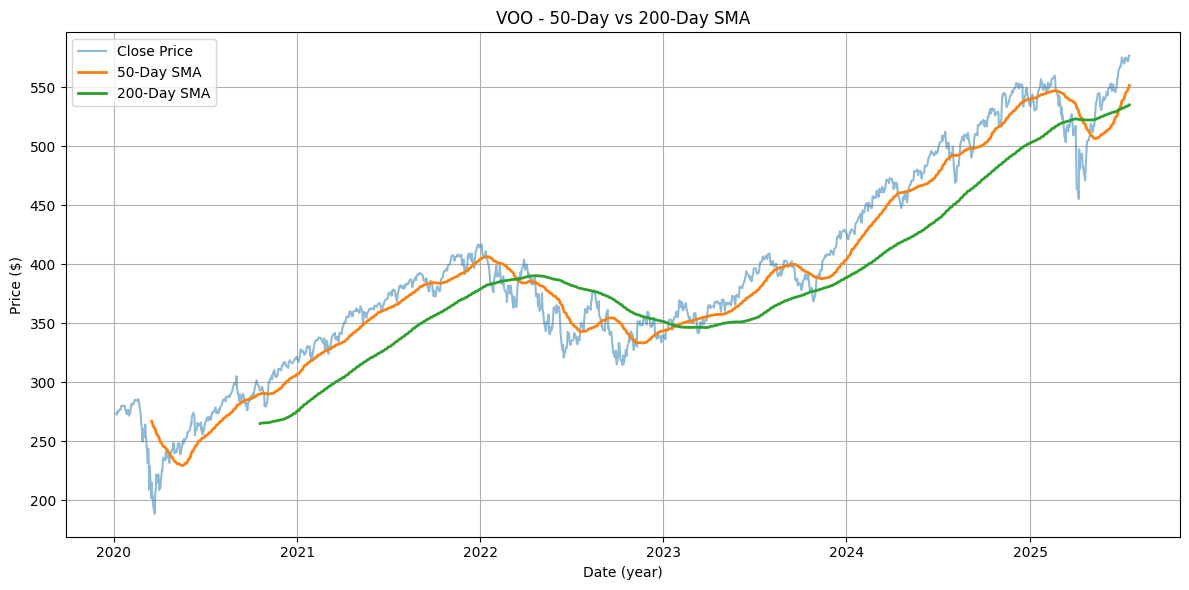

/tmp/ipython-input-1-1790634752.py:71: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(ticker, start=start.strftime('%Y-%m-%d'), end=end.strftime('%Y-%m-%d'))  # DataFrame - download historical daily price data from Yahoo Finance
[*********************100%***********************]  1 of 1 completed
/tmp/ipython-input-1-1790634752.py:81: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  current_price = float(df['Close'].iloc[-1])     # Extract the most recent closing price and convert to float for calculations
/tmp/ipython-input-1-1790634752.py:34: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  past_price = float(past_data['Close'].iloc[-1])             # Extract the past closing price (most recent value before target date)




Analyzing: DIA

Current Price: $443.26

Returns:
1 Week Return: -0.03%
1 Month Return: 5.17%
3 Months Return: 13.72%
6 Months Return: 2.77%
1 Year Return: 10.45%
5 Years Return: 81.34%


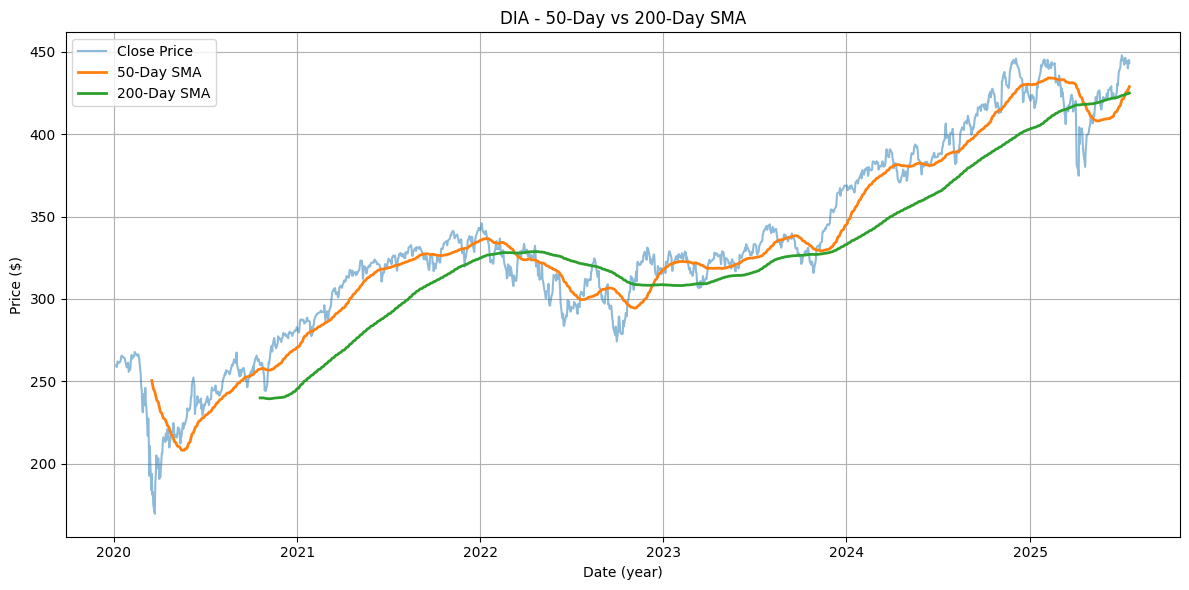

/tmp/ipython-input-1-1790634752.py:71: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(ticker, start=start.strftime('%Y-%m-%d'), end=end.strftime('%Y-%m-%d'))  # DataFrame - download historical daily price data from Yahoo Finance
[*********************100%***********************]  1 of 1 completed
/tmp/ipython-input-1-1790634752.py:81: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  current_price = float(df['Close'].iloc[-1])     # Extract the most recent closing price and convert to float for calculations
/tmp/ipython-input-1-1790634752.py:34: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  past_price = float(past_data['Close'].iloc[-1])             # Extract the past closing price (most recent value before target date)




Analyzing: BRK-B

Current Price: $473.80

Returns:
1 Week Return: -0.43%
1 Month Return: -2.34%
3 Months Return: -8.57%
6 Months Return: 1.25%
1 Year Return: 7.24%
5 Years Return: 148.37%


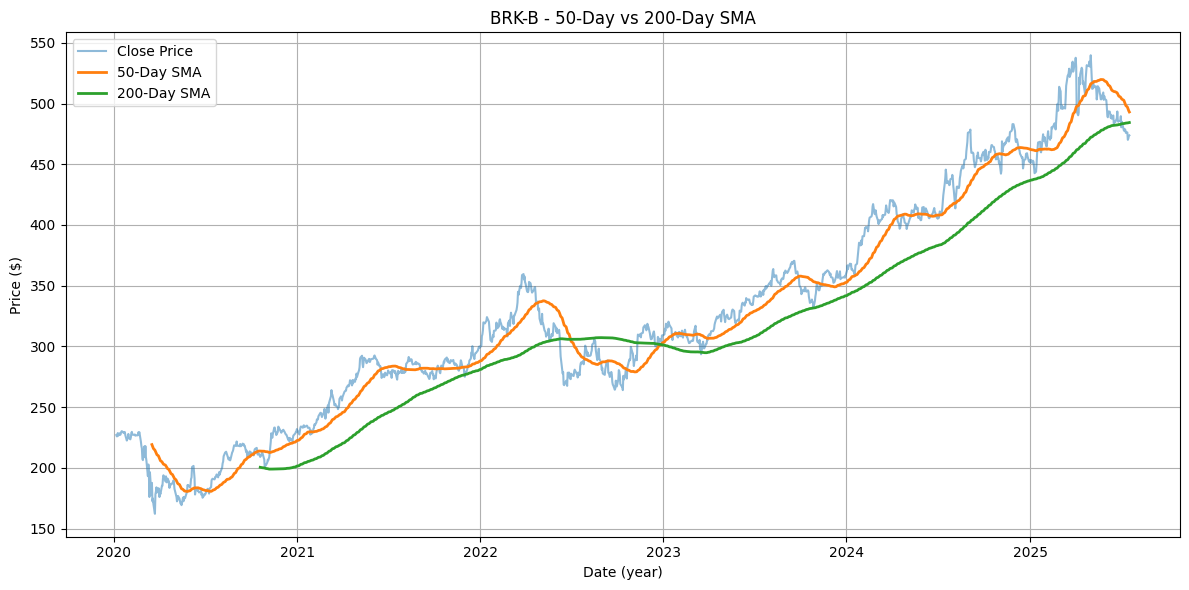

/tmp/ipython-input-1-1790634752.py:71: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(ticker, start=start.strftime('%Y-%m-%d'), end=end.strftime('%Y-%m-%d'))  # DataFrame - download historical daily price data from Yahoo Finance
[*********************100%***********************]  1 of 1 completed
/tmp/ipython-input-1-1790634752.py:81: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  current_price = float(df['Close'].iloc[-1])     # Extract the most recent closing price and convert to float for calculations
/tmp/ipython-input-1-1790634752.py:34: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  past_price = float(past_data['Close'].iloc[-1])             # Extract the past closing price (most recent value before target date)




Analyzing: TQQQ

Current Price: $86.75

Returns:
1 Week Return: 3.62%
1 Month Return: 18.42%
3 Months Return: 92.63%
6 Months Return: 4.94%
1 Year Return: 20.24%
5 Years Return: 223.49%


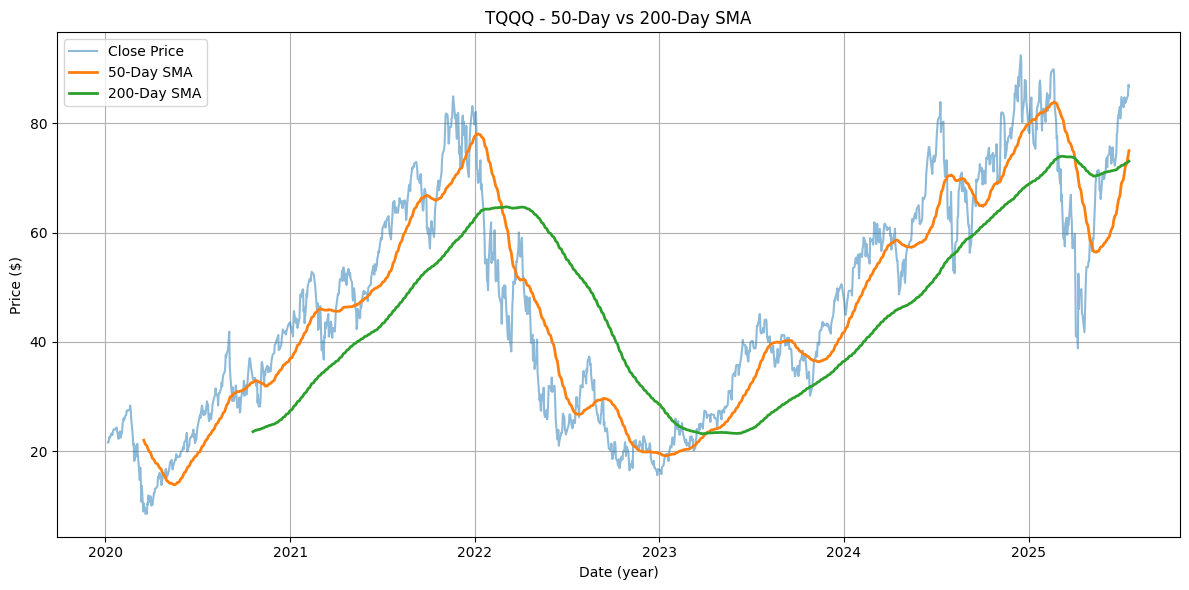

/tmp/ipython-input-1-1790634752.py:71: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(ticker, start=start.strftime('%Y-%m-%d'), end=end.strftime('%Y-%m-%d'))  # DataFrame - download historical daily price data from Yahoo Finance
[*********************100%***********************]  1 of 1 completed
/tmp/ipython-input-1-1790634752.py:81: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  current_price = float(df['Close'].iloc[-1])     # Extract the most recent closing price and convert to float for calculations
/tmp/ipython-input-1-1790634752.py:34: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  past_price = float(past_data['Close'].iloc[-1])             # Extract the past closing price (most recent value before target date)




Analyzing: AMZN

Current Price: $226.13

Returns:
1 Week Return: 0.49%
1 Month Return: 6.40%
3 Months Return: 31.01%
6 Months Return: 0.08%
1 Year Return: 23.06%
5 Years Return: 52.69%


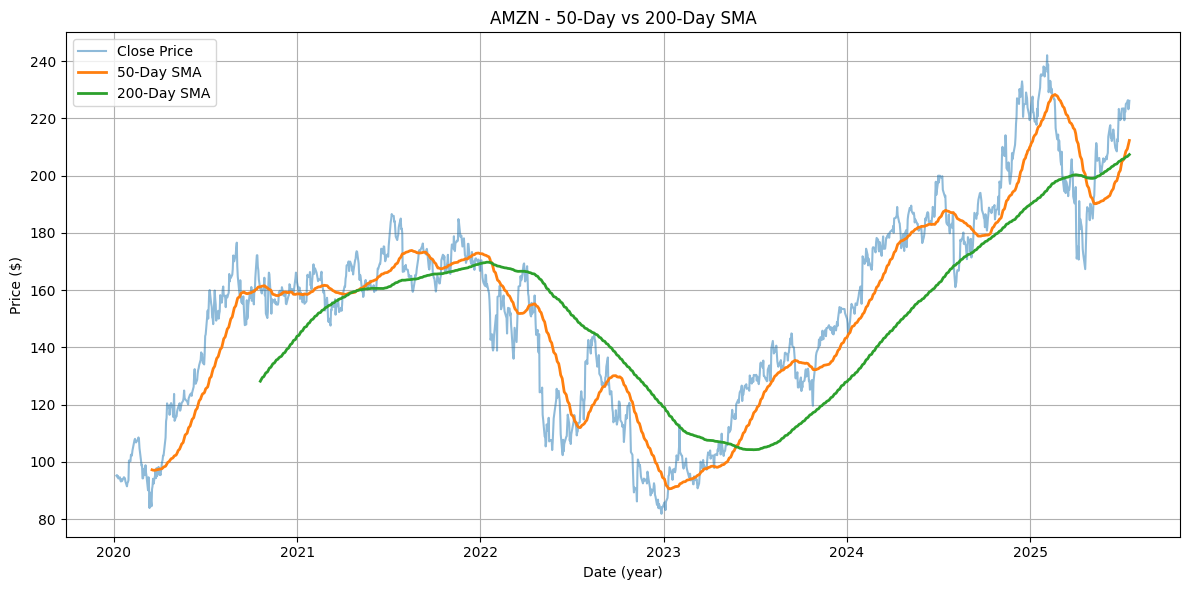

/tmp/ipython-input-1-1790634752.py:71: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(ticker, start=start.strftime('%Y-%m-%d'), end=end.strftime('%Y-%m-%d'))  # DataFrame - download historical daily price data from Yahoo Finance
[*********************100%***********************]  1 of 1 completed
/tmp/ipython-input-1-1790634752.py:81: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  current_price = float(df['Close'].iloc[-1])     # Extract the most recent closing price and convert to float for calculations
/tmp/ipython-input-1-1790634752.py:34: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  past_price = float(past_data['Close'].iloc[-1])             # Extract the past closing price (most recent value before target date)




Analyzing: TSLA

Current Price: $329.65

Returns:
1 Week Return: 5.15%
1 Month Return: 2.36%
3 Months Return: 36.57%
6 Months Return: -22.71%
1 Year Return: 32.27%
5 Years Return: 229.47%


/tmp/ipython-input-1-1790634752.py:71: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(ticker, start=start.strftime('%Y-%m-%d'), end=end.strftime('%Y-%m-%d'))  # DataFrame - download historical daily price data from Yahoo Finance
[*********************100%***********************]  1 of 1 completed
/tmp/ipython-input-1-1790634752.py:81: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  current_price = float(df['Close'].iloc[-1])     # Extract the most recent closing price and convert to float for calculations
/tmp/ipython-input-1-1790634752.py:34: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  past_price = float(past_data['Close'].iloc[-1])             # Extract the past closing price (most recent value before target date)




Analyzing: VTI

Current Price: $309.09

Returns:
1 Week Return: 0.67%
1 Month Return: 5.41%
3 Months Return: 19.82%
6 Months Return: 5.03%
1 Year Return: 14.78%
5 Years Return: 103.76%


/tmp/ipython-input-1-1790634752.py:71: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(ticker, start=start.strftime('%Y-%m-%d'), end=end.strftime('%Y-%m-%d'))  # DataFrame - download historical daily price data from Yahoo Finance
[*********************100%***********************]  1 of 1 completed
/tmp/ipython-input-1-1790634752.py:81: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  current_price = float(df['Close'].iloc[-1])     # Extract the most recent closing price and convert to float for calculations
/tmp/ipython-input-1-1790634752.py:34: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  past_price = float(past_data['Close'].iloc[-1])             # Extract the past closing price (most recent value before target date)




Analyzing: NVDA

Current Price: $172.41

Returns:
1 Week Return: 4.54%
1 Month Return: 18.51%
3 Months Return: 69.89%
6 Months Return: 25.22%
1 Year Return: 42.43%
5 Years Return: 1595.62%


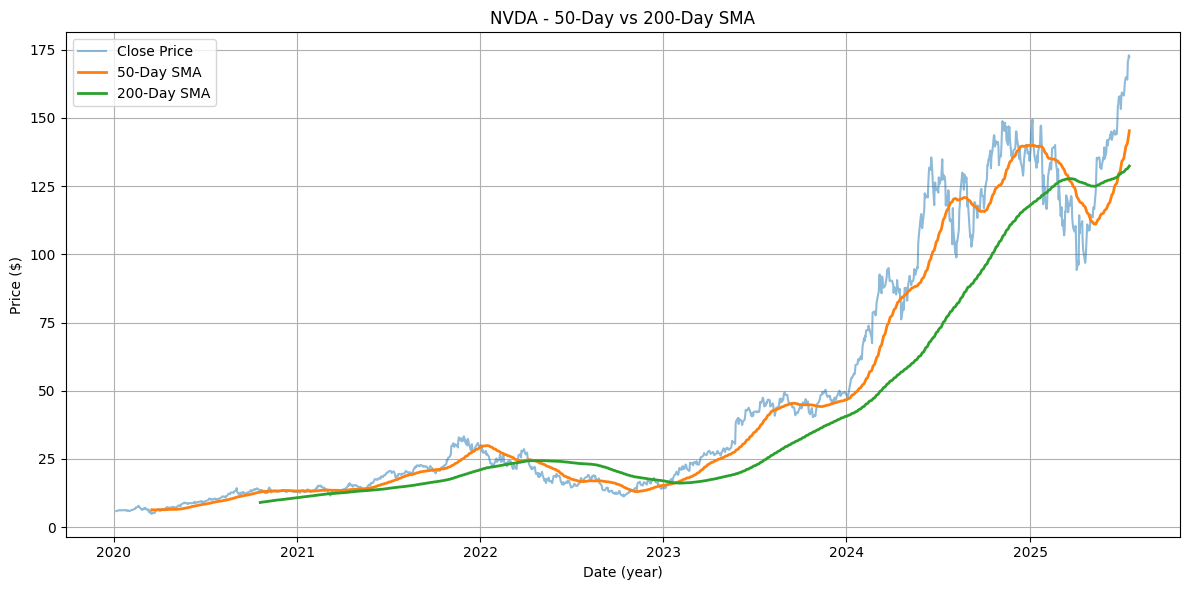

/tmp/ipython-input-1-1790634752.py:71: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(ticker, start=start.strftime('%Y-%m-%d'), end=end.strftime('%Y-%m-%d'))  # DataFrame - download historical daily price data from Yahoo Finance
[*********************100%***********************]  1 of 1 completed
/tmp/ipython-input-1-1790634752.py:81: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  current_price = float(df['Close'].iloc[-1])     # Extract the most recent closing price and convert to float for calculations
/tmp/ipython-input-1-1790634752.py:34: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  past_price = float(past_data['Close'].iloc[-1])             # Extract the past closing price (most recent value before target date)




Analyzing: GOOGL

Current Price: $185.06

Returns:
1 Week Return: 2.70%
1 Month Return: 6.77%
3 Months Return: 22.57%
6 Months Return: -5.36%
1 Year Return: 4.65%
5 Years Return: 145.47%


/tmp/ipython-input-1-1790634752.py:71: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(ticker, start=start.strftime('%Y-%m-%d'), end=end.strftime('%Y-%m-%d'))  # DataFrame - download historical daily price data from Yahoo Finance
[*********************100%***********************]  1 of 1 completed
/tmp/ipython-input-1-1790634752.py:81: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  current_price = float(df['Close'].iloc[-1])     # Extract the most recent closing price and convert to float for calculations
/tmp/ipython-input-1-1790634752.py:34: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  past_price = float(past_data['Close'].iloc[-1])             # Extract the past closing price (most recent value before target date)




Analyzing: AAPL

Current Price: $211.18

Returns:
1 Week Return: 0.01%
1 Month Return: 7.43%
3 Months Return: 7.35%
6 Months Return: -7.95%
1 Year Return: -5.36%
5 Years Return: 125.53%


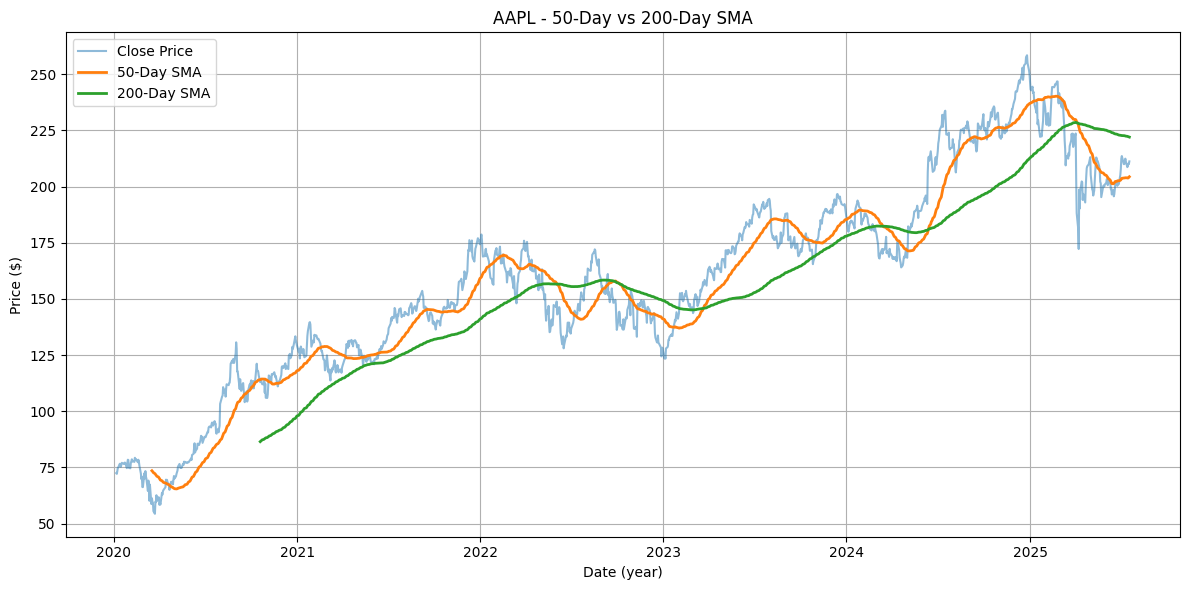

/tmp/ipython-input-1-1790634752.py:71: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(ticker, start=start.strftime('%Y-%m-%d'), end=end.strftime('%Y-%m-%d'))  # DataFrame - download historical daily price data from Yahoo Finance
[*********************100%***********************]  1 of 1 completed
/tmp/ipython-input-1-1790634752.py:81: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  current_price = float(df['Close'].iloc[-1])     # Extract the most recent closing price and convert to float for calculations
/tmp/ipython-input-1-1790634752.py:34: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  past_price = float(past_data['Close'].iloc[-1])             # Extract the past closing price (most recent value before target date)




Analyzing: QBIG

Current Price: $33.85

Returns:
1 Week Return: 1.91%
1 Month Return: 8.84%
3 Months Return: 37.11%
6 Months Return: 6.08%
1 Year Return: Not enough data.
5 Years Return: Not enough data.


/tmp/ipython-input-1-1790634752.py:71: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(ticker, start=start.strftime('%Y-%m-%d'), end=end.strftime('%Y-%m-%d'))  # DataFrame - download historical daily price data from Yahoo Finance
[*********************100%***********************]  1 of 1 completed
/tmp/ipython-input-1-1790634752.py:81: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  current_price = float(df['Close'].iloc[-1])     # Extract the most recent closing price and convert to float for calculations
/tmp/ipython-input-1-1790634752.py:34: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  past_price = float(past_data['Close'].iloc[-1])             # Extract the past closing price (most recent value before target date)




Analyzing: VB

Current Price: $243.27

Returns:
1 Week Return: 0.40%
1 Month Return: 5.52%
3 Months Return: 17.90%
6 Months Return: -1.39%
1 Year Return: 8.15%
5 Years Return: 74.86%


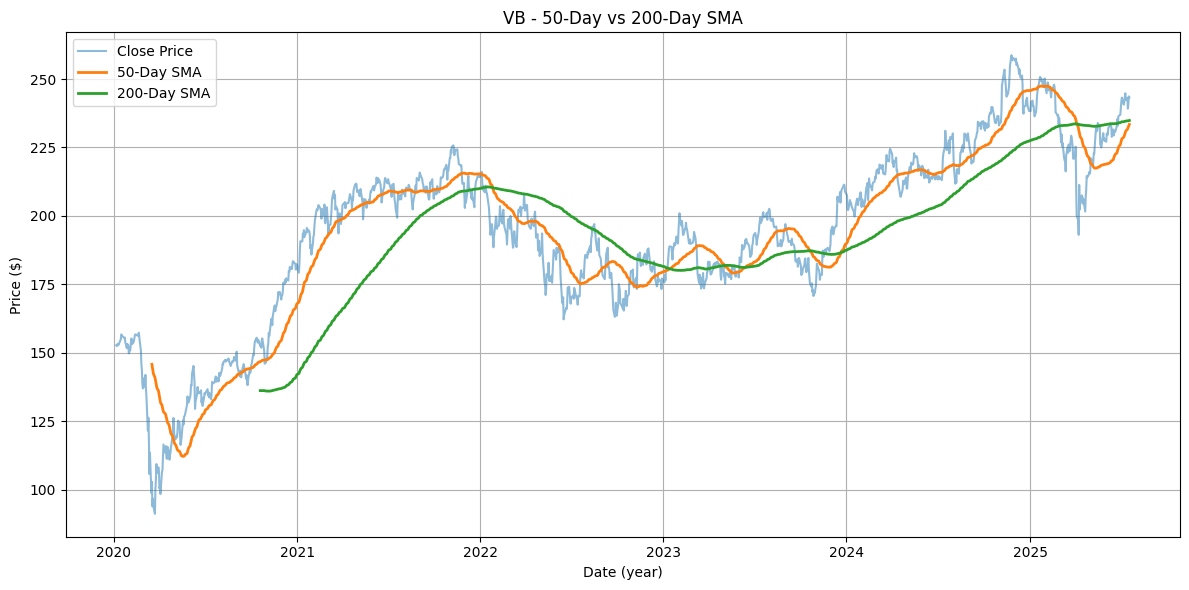

/tmp/ipython-input-1-1790634752.py:71: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(ticker, start=start.strftime('%Y-%m-%d'), end=end.strftime('%Y-%m-%d'))  # DataFrame - download historical daily price data from Yahoo Finance
[*********************100%***********************]  1 of 1 completed
/tmp/ipython-input-1-1790634752.py:81: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  current_price = float(df['Close'].iloc[-1])     # Extract the most recent closing price and convert to float for calculations
/tmp/ipython-input-1-1790634752.py:34: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  past_price = float(past_data['Close'].iloc[-1])             # Extract the past closing price (most recent value before target date)




Analyzing: META

Current Price: $704.28

Returns:
1 Week Return: -1.84%
1 Month Return: 1.22%
3 Months Return: 40.55%
6 Months Return: 15.12%
1 Year Return: 48.51%
5 Years Return: 192.59%


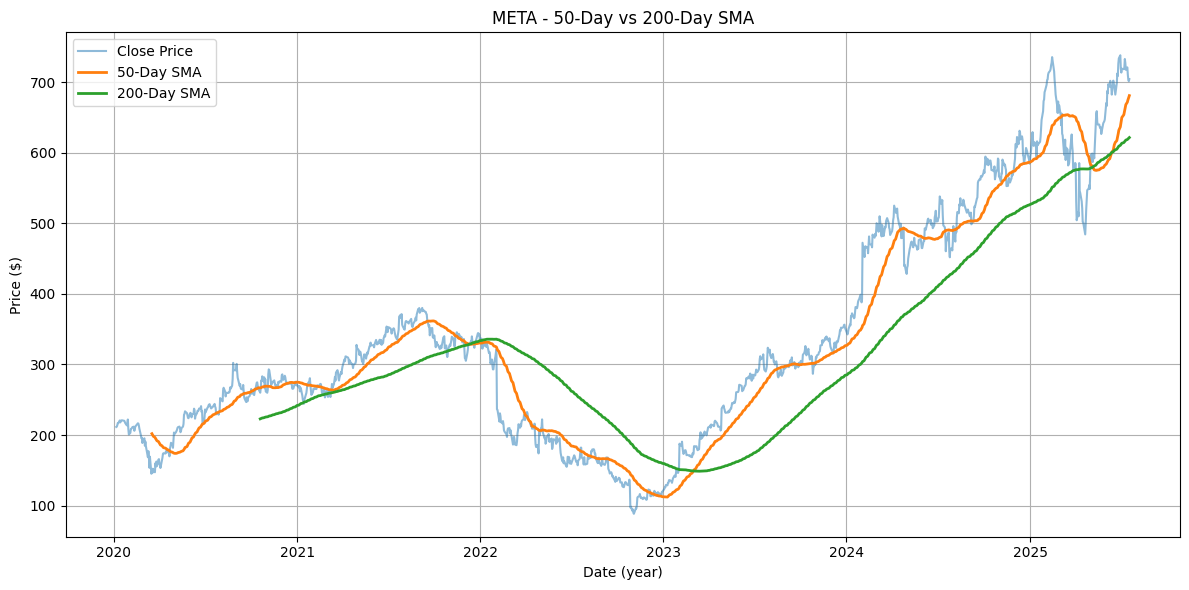

/tmp/ipython-input-1-1790634752.py:71: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(ticker, start=start.strftime('%Y-%m-%d'), end=end.strftime('%Y-%m-%d'))  # DataFrame - download historical daily price data from Yahoo Finance
[*********************100%***********************]  1 of 1 completed
/tmp/ipython-input-1-1790634752.py:81: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  current_price = float(df['Close'].iloc[-1])     # Extract the most recent closing price and convert to float for calculations
/tmp/ipython-input-1-1790634752.py:34: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  past_price = float(past_data['Close'].iloc[-1])             # Extract the past closing price (most recent value before target date)




Analyzing: MSFT

Current Price: $510.05

Returns:
1 Week Return: 1.34%
1 Month Return: 6.21%
3 Months Return: 38.94%
6 Months Return: 19.34%
1 Year Return: 16.71%
5 Years Return: 162.40%


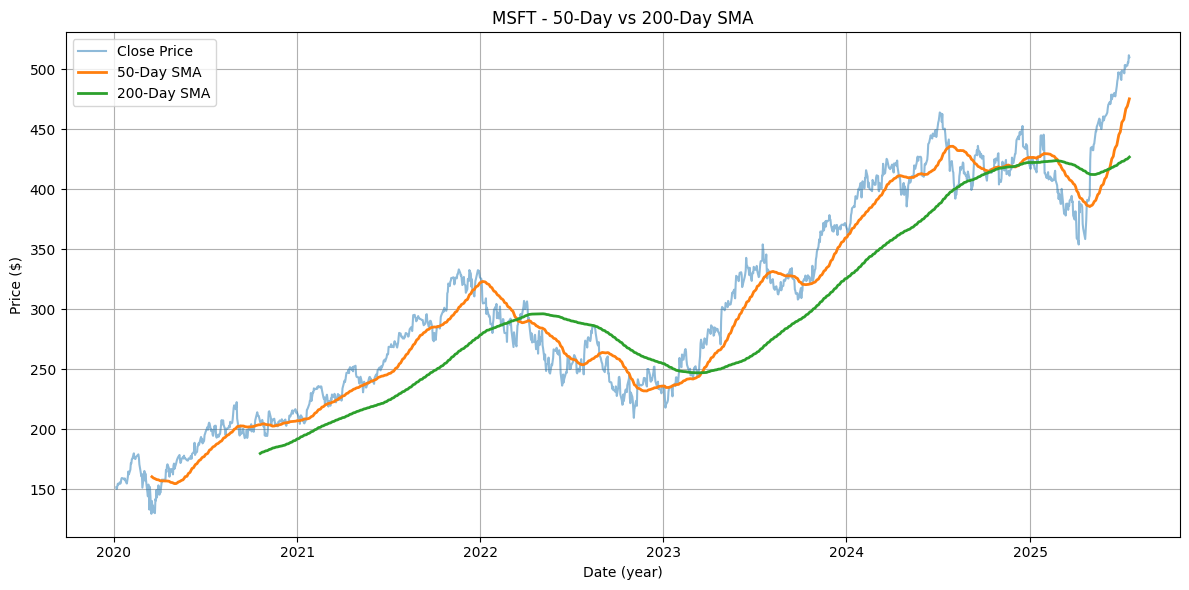

/tmp/ipython-input-1-1790634752.py:71: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(ticker, start=start.strftime('%Y-%m-%d'), end=end.strftime('%Y-%m-%d'))  # DataFrame - download historical daily price data from Yahoo Finance
[*********************100%***********************]  1 of 1 completed
/tmp/ipython-input-1-1790634752.py:81: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  current_price = float(df['Close'].iloc[-1])     # Extract the most recent closing price and convert to float for calculations
/tmp/ipython-input-1-1790634752.py:34: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  past_price = float(past_data['Close'].iloc[-1])             # Extract the past closing price (most recent value before target date)




Analyzing: GS

Current Price: $708.26

Returns:
1 Week Return: 0.47%
1 Month Return: 11.49%
3 Months Return: 39.71%
6 Months Return: 14.28%
1 Year Return: 48.73%
5 Years Return: 277.72%


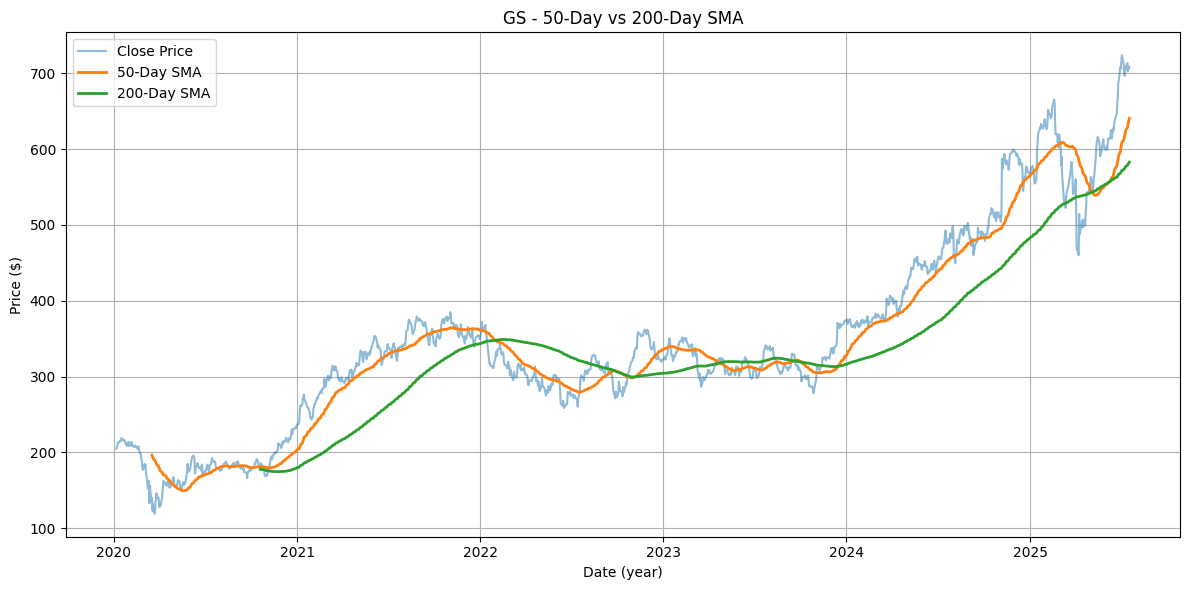

/tmp/ipython-input-1-1790634752.py:71: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(ticker, start=start.strftime('%Y-%m-%d'), end=end.strftime('%Y-%m-%d'))  # DataFrame - download historical daily price data from Yahoo Finance
[*********************100%***********************]  1 of 1 completed
/tmp/ipython-input-1-1790634752.py:81: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  current_price = float(df['Close'].iloc[-1])     # Extract the most recent closing price and convert to float for calculations
/tmp/ipython-input-1-1790634752.py:34: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  past_price = float(past_data['Close'].iloc[-1])             # Extract the past closing price (most recent value before target date)




Analyzing: BLK

Current Price: $1103.59

Returns:
1 Week Return: 0.18%
1 Month Return: 12.67%
3 Months Return: 26.68%
6 Months Return: 11.00%
1 Year Return: 36.03%
5 Years Return: 112.01%


/tmp/ipython-input-1-1790634752.py:71: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(ticker, start=start.strftime('%Y-%m-%d'), end=end.strftime('%Y-%m-%d'))  # DataFrame - download historical daily price data from Yahoo Finance
[*********************100%***********************]  1 of 1 completed
/tmp/ipython-input-1-1790634752.py:81: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  current_price = float(df['Close'].iloc[-1])     # Extract the most recent closing price and convert to float for calculations
/tmp/ipython-input-1-1790634752.py:34: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  past_price = float(past_data['Close'].iloc[-1])             # Extract the past closing price (most recent value before target date)




Analyzing: JPM

Current Price: $291.27

Returns:
1 Week Return: 1.54%
1 Month Return: 6.83%
3 Months Return: 26.17%
6 Months Return: 13.63%
1 Year Return: 41.83%
5 Years Return: 239.34%


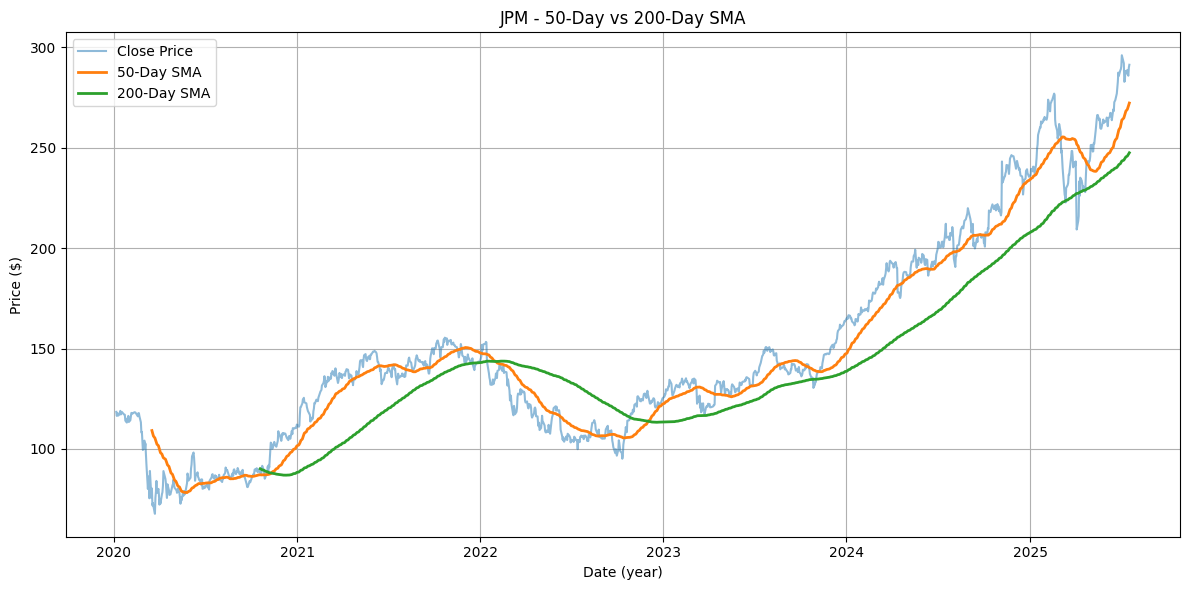

/tmp/ipython-input-1-1790634752.py:71: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(ticker, start=start.strftime('%Y-%m-%d'), end=end.strftime('%Y-%m-%d'))  # DataFrame - download historical daily price data from Yahoo Finance
[*********************100%***********************]  1 of 1 completed
/tmp/ipython-input-1-1790634752.py:81: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  current_price = float(df['Close'].iloc[-1])     # Extract the most recent closing price and convert to float for calculations
/tmp/ipython-input-1-1790634752.py:34: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  past_price = float(past_data['Close'].iloc[-1])             # Extract the past closing price (most recent value before target date)




Analyzing: COST

Current Price: $950.95

Returns:
1 Week Return: -2.00%
1 Month Return: -2.46%
3 Months Return: -4.25%
6 Months Return: 1.07%
1 Year Return: 13.88%
5 Years Return: 217.95%


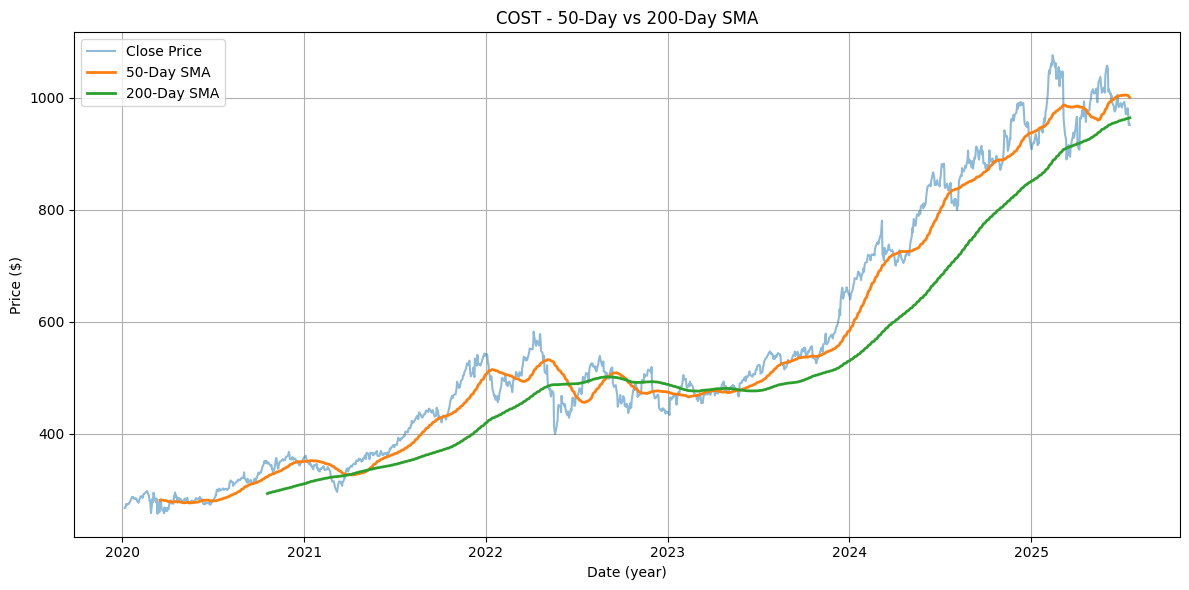

/tmp/ipython-input-1-1790634752.py:71: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(ticker, start=start.strftime('%Y-%m-%d'), end=end.strftime('%Y-%m-%d'))  # DataFrame - download historical daily price data from Yahoo Finance
[*********************100%***********************]  1 of 1 completed
/tmp/ipython-input-1-1790634752.py:81: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  current_price = float(df['Close'].iloc[-1])     # Extract the most recent closing price and convert to float for calculations
/tmp/ipython-input-1-1790634752.py:34: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  past_price = float(past_data['Close'].iloc[-1])             # Extract the past closing price (most recent value before target date)




Analyzing: SOFI

Current Price: $21.81

Returns:
1 Week Return: 2.88%
1 Month Return: 41.99%
3 Months Return: 98.63%
6 Months Return: 32.18%
1 Year Return: 189.64%
5 Years Return: Not enough data.


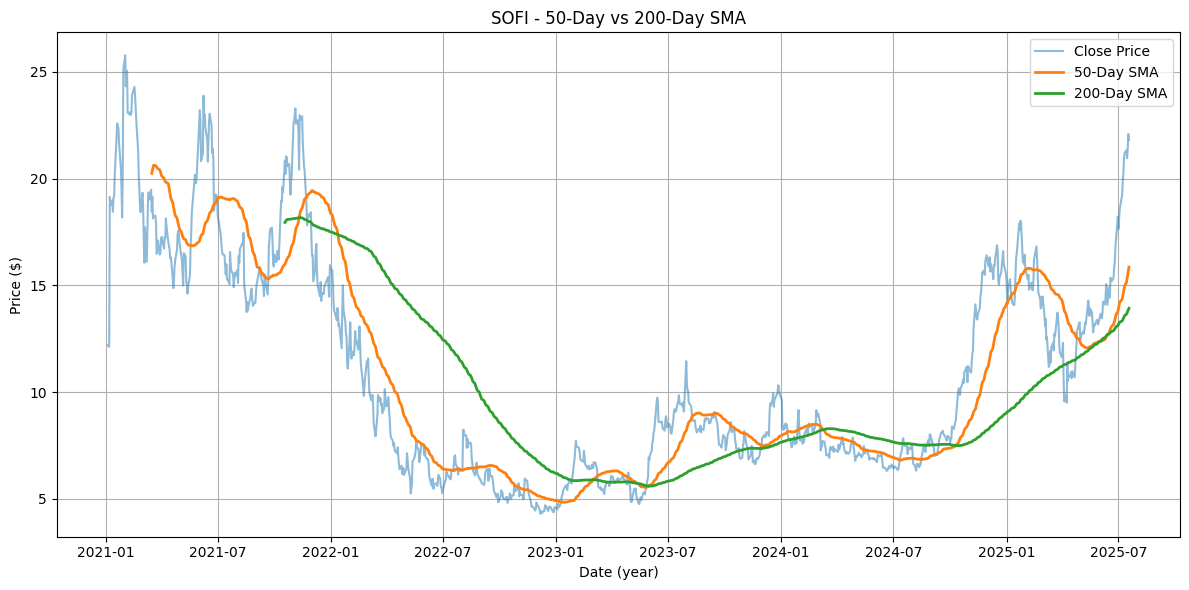

/tmp/ipython-input-1-1790634752.py:71: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(ticker, start=start.strftime('%Y-%m-%d'), end=end.strftime('%Y-%m-%d'))  # DataFrame - download historical daily price data from Yahoo Finance
[*********************100%***********************]  1 of 1 completed
/tmp/ipython-input-1-1790634752.py:81: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  current_price = float(df['Close'].iloc[-1])     # Extract the most recent closing price and convert to float for calculations
/tmp/ipython-input-1-1790634752.py:34: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  past_price = float(past_data['Close'].iloc[-1])             # Extract the past closing price (most recent value before target date)




Analyzing: IBIT

Current Price: $66.68

Returns:
1 Week Return: -0.79%
1 Month Return: 13.07%
3 Months Return: 38.17%
6 Months Return: 11.84%
1 Year Return: 84.10%
5 Years Return: Not enough data.


/tmp/ipython-input-1-1790634752.py:71: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(ticker, start=start.strftime('%Y-%m-%d'), end=end.strftime('%Y-%m-%d'))  # DataFrame - download historical daily price data from Yahoo Finance
[*********************100%***********************]  1 of 1 completed
/tmp/ipython-input-1-1790634752.py:81: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  current_price = float(df['Close'].iloc[-1])     # Extract the most recent closing price and convert to float for calculations
/tmp/ipython-input-1-1790634752.py:34: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  past_price = float(past_data['Close'].iloc[-1])             # Extract the past closing price (most recent value before target date)




Analyzing: BITO

Current Price: $22.54

Returns:
1 Week Return: -0.79%
1 Month Return: 12.53%
3 Months Return: 35.96%
6 Months Return: 8.71%
1 Year Return: 72.83%
5 Years Return: Not enough data.


/tmp/ipython-input-1-1790634752.py:71: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(ticker, start=start.strftime('%Y-%m-%d'), end=end.strftime('%Y-%m-%d'))  # DataFrame - download historical daily price data from Yahoo Finance
[*********************100%***********************]  1 of 1 completed
/tmp/ipython-input-1-1790634752.py:81: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  current_price = float(df['Close'].iloc[-1])     # Extract the most recent closing price and convert to float for calculations
/tmp/ipython-input-1-1790634752.py:34: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  past_price = float(past_data['Close'].iloc[-1])             # Extract the past closing price (most recent value before target date)




Analyzing: PTON

Current Price: $6.29

Returns:
1 Week Return: -1.41%
1 Month Return: 1.13%
3 Months Return: 16.70%
6 Months Return: -23.94%
1 Year Return: 70.46%
5 Years Return: -89.25%


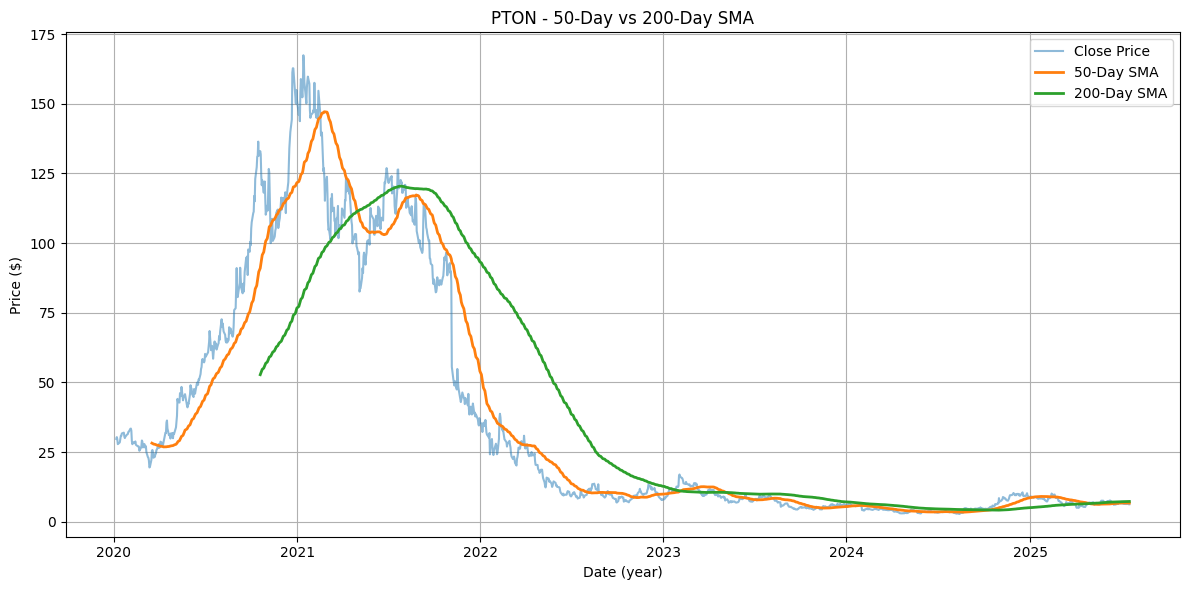

/tmp/ipython-input-1-1790634752.py:71: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(ticker, start=start.strftime('%Y-%m-%d'), end=end.strftime('%Y-%m-%d'))  # DataFrame - download historical daily price data from Yahoo Finance
[*********************100%***********************]  1 of 1 completed
/tmp/ipython-input-1-1790634752.py:81: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  current_price = float(df['Close'].iloc[-1])     # Extract the most recent closing price and convert to float for calculations
/tmp/ipython-input-1-1790634752.py:34: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  past_price = float(past_data['Close'].iloc[-1])             # Extract the past closing price (most recent value before target date)




Analyzing: YETI

Current Price: $35.00

Returns:
1 Week Return: 9.07%
1 Month Return: 19.49%
3 Months Return: 25.63%
6 Months Return: -6.17%
1 Year Return: -10.83%
5 Years Return: -20.74%


/tmp/ipython-input-1-1790634752.py:71: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(ticker, start=start.strftime('%Y-%m-%d'), end=end.strftime('%Y-%m-%d'))  # DataFrame - download historical daily price data from Yahoo Finance
[*********************100%***********************]  1 of 1 completed
/tmp/ipython-input-1-1790634752.py:81: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  current_price = float(df['Close'].iloc[-1])     # Extract the most recent closing price and convert to float for calculations
/tmp/ipython-input-1-1790634752.py:34: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  past_price = float(past_data['Close'].iloc[-1])             # Extract the past closing price (most recent value before target date)




Analyzing: VNQ

Current Price: $89.94

Returns:
1 Week Return: 0.20%
1 Month Return: 1.04%
3 Months Return: 4.59%
6 Months Return: 2.35%
1 Year Return: 5.03%
5 Years Return: 38.35%


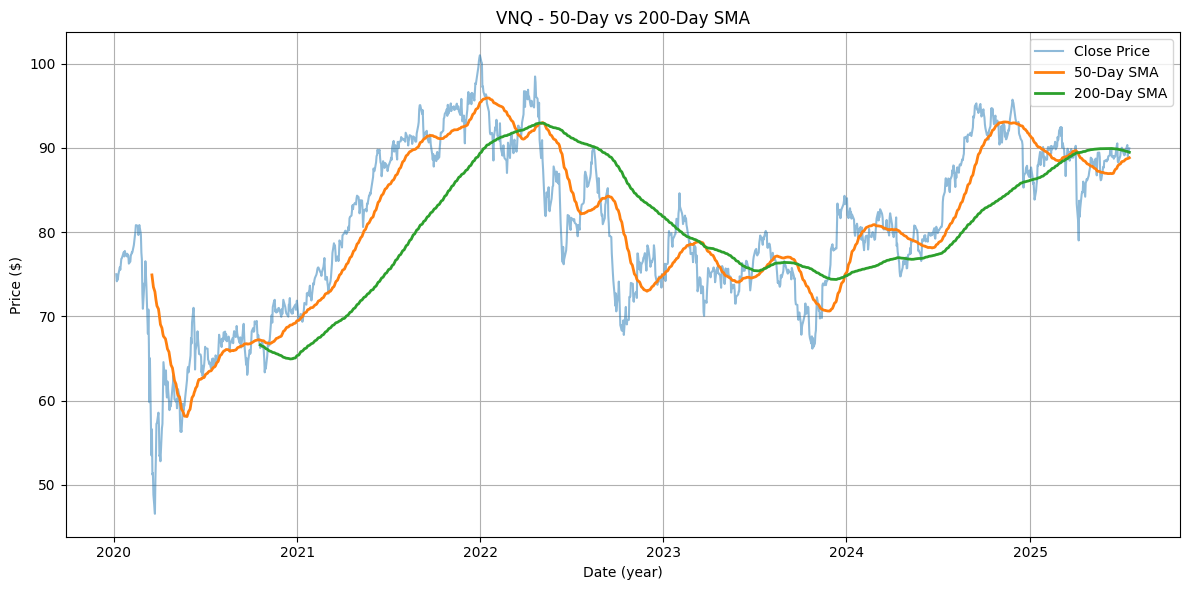

In [2]:
# ========================
# INPUT STOCK TICKERS HERE
# ========================
tickers = ['QQQ', 'VOO', 'DIA', 'BRK-B', 'TQQQ', 'AMZN', 'TSLA', 'VTI', 'NVDA', 'GOOGL', 'AAPL', 'QBIG', 'VB', 'META', 'MSFT', 'GS', 'BLK', 'JPM', 'COST',
           'SOFI', 'IBIT', 'BITO', 'PTON', 'YETI', 'VNQ']  # ← Add or remove tickers here

# Call the function to analyze each stock
for ticker in tickers:
    analyze_stock(ticker)

In [3]:
# ------------------------------------------------------------------------------------------------------------
# A simple backtest model using Golden Cross & Death Cross signals and comparing them to "Buy and Hold" method
# ------------------------------------------------------------------------------------------------------------

print("A simple backtest model using the Golden Cross & Death Cross signals and comparing it to the 'Buy & Hold' method.")
print("\nSimulate entering(buying) and exiting(selling) positions based on crossover signals.")
print("\nWhen the 50-day SMA crosses higher than the 200-day SMA, this is known as the Golden Cross and it symbolizes a bullish outlook.")
print("\nWhen the 50-day SMA crosses lower than the 200-day SMA, this is known as the Death Cross and it symbolizes a bearish outlook.")
print("\nA Golden Cross is typically a good sign to buy, and a Death Cross is known as a good time to sell.")
print("\nComparing the backtest model vs the 'Buy and Hold' method.")

# ---------------
# Import packages
# ---------------
import yfinance as yf                     # Download stock data from Yahoo Finance
import pandas as pd                       # Pandas library for data manipulation
import matplotlib.pyplot as plt           # Plotting
from datetime import datetime, timedelta  # For handling date ranges

# -------------------
# Download stock data
# -------------------
def get_data(ticker):

    # Define date range
    end = datetime.today()  # Today
    start = end - timedelta(days=5*365 + 200)  # Last 5 years + 200 days for SMA calculation buffer

    # DataFrame
    df = yf.download(ticker, start=start.strftime('%Y-%m-%d'), end=end.strftime('%Y-%m-%d'))  # Download historical daily price data from Yahoo Finance
    return df

# -------------------------------------------
# Generate Golden Cross / Death Cross signals
# -------------------------------------------
def generate_signals(df):

    # Calculate the SMAs
    df['SMA_50'] = df['Close'].rolling(window=50).mean()    # 50 day
    df['SMA_200'] = df['Close'].rolling(window=200).mean()  # 200 day

    df.dropna(inplace=True) # Drop rows where SMAs are not yet available (i.e., NaN values)

    # Create a trading signal column:
    df['Signal'] = 0                                    # Signal = 0 when SMA_50 <= SMA_200 → Death Cross (exit/neutral)
    df.loc[df['SMA_50'] > df['SMA_200'], 'Signal'] = 1  # Signal = 1 when SMA_50 > SMA_200 → Golden Cross (buy/long)

    df['Position'] = df['Signal'].shift(1)              # Shift the signal forward by 1 day to avoid lookahead bias (don't want to trade on the same day the signal is calculated)
    df.dropna(inplace=True)                             # Drop any new NaNs created by the shift
    return df

# --------------------------------------------------------------
# Backtest the strategy and compare to the "Buy & Hold" strategy
# --------------------------------------------------------------
def backtest(df):

    # Calculate daily return of the stock
    df['Daily Return'] = df['Close'].pct_change()

    # Strategy return: only earn daily return when position is 1 (in the market)
    df['Strategy Return'] = df['Position'] * df['Daily Return']

    # Cumulative returns starting from 1 (i.e., 100%)
    df['Portfolio Cumulative'] = (1 + df['Strategy Return']).cumprod()
    df['Buy & Hold Cumulative'] = (1 + df['Daily Return']).cumprod()

    # Calculate final cumulative returns in percent
    strategy_total_return = (df['Portfolio Cumulative'].iloc[-1] - 1) * 100
    bh_total_return = (df['Buy & Hold Cumulative'].iloc[-1] - 1) * 100

    # Print results as percentages
    print(f"\nBacktest Results:")
    print(f"Strategy Total Return: {strategy_total_return:.2f}%")
    print(f"Buy & Hold Return: {bh_total_return:.2f}%")

    # Plot cumulative returns over time
    plt.figure(figsize=(12, 6))
    plt.plot(df.index, df['Portfolio Cumulative'], label='Strategy', linewidth=2)
    plt.plot(df.index, df['Buy & Hold Cumulative'], label='Buy & Hold', linestyle='--')
    plt.title("Cumulative Returns: Strategy vs Buy & Hold")
    plt.xlabel("Date")
    plt.ylabel("Growth (Start = 1.0)")
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()

# Full analysis pipeline
def run_quant_model(ticker):
    print(f"\n\nRunning backtest for {ticker}")
    df = get_data(ticker)
    if df.empty:
        print("No data found.")
        return
    df = generate_signals(df)
    if df.empty:
        print("Not enough data after generating signals.")
        return
    backtest(df)

A simple backtest model using the Golden Cross & Death Cross signals and comparing it to the 'Buy & Hold' method.

Simulate entering(buying) and exiting(selling) positions based on crossover signals.

When the 50-day SMA crosses higher than the 200-day SMA, this is known as the Golden Cross and it symbolizes a bullish outlook.

When the 50-day SMA crosses lower than the 200-day SMA, this is known as the Death Cross and it symbolizes a bearish outlook.

A Golden Cross is typically a good sign to buy, and a Death Cross is known as a good time to sell.

Comparing the backtest model vs the 'Buy and Hold' method.


/tmp/ipython-input-3-3871942033.py:30: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(ticker, start=start.strftime('%Y-%m-%d'), end=end.strftime('%Y-%m-%d'))  # Download historical daily price data from Yahoo Finance
[*********************100%***********************]  1 of 1 completed



Running backtest for QQQ

Backtest Results:
Strategy Total Return: 108.66%
Buy & Hold Return: 103.23%


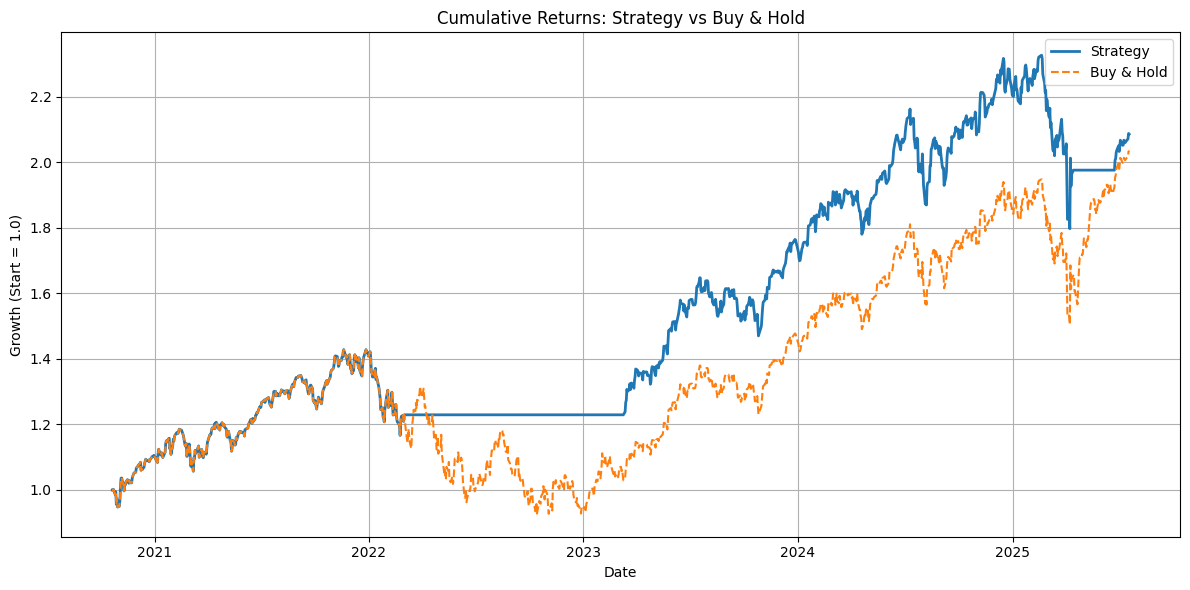

/tmp/ipython-input-3-3871942033.py:30: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(ticker, start=start.strftime('%Y-%m-%d'), end=end.strftime('%Y-%m-%d'))  # Download historical daily price data from Yahoo Finance
[*********************100%***********************]  1 of 1 completed



Running backtest for VOO

Backtest Results:
Strategy Total Return: 77.16%
Buy & Hold Return: 96.19%


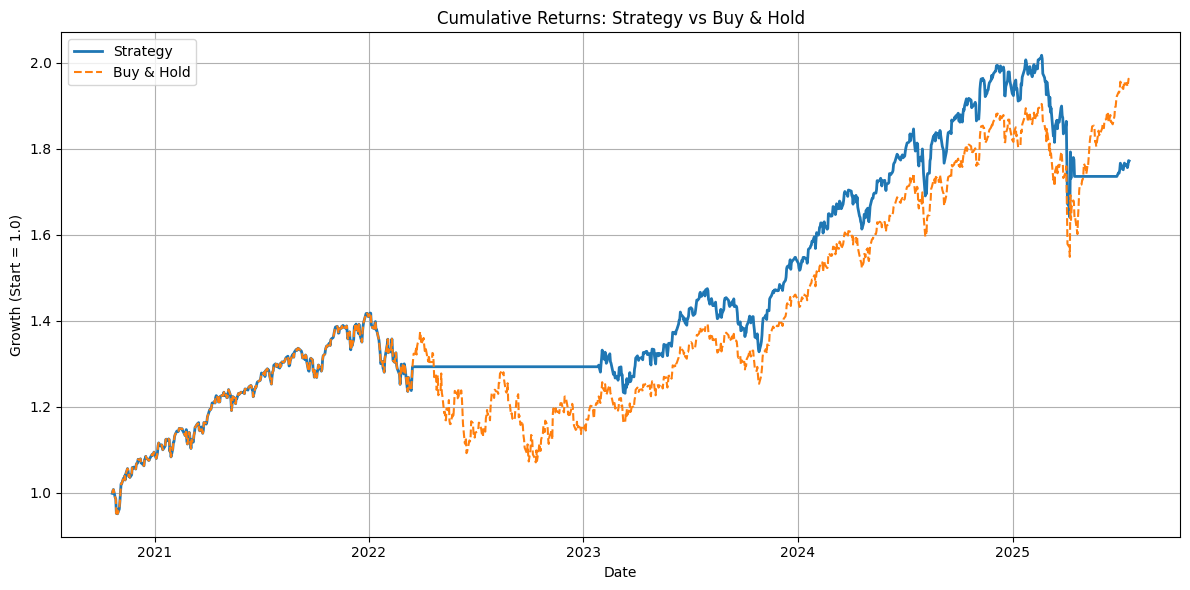

/tmp/ipython-input-3-3871942033.py:30: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(ticker, start=start.strftime('%Y-%m-%d'), end=end.strftime('%Y-%m-%d'))  # Download historical daily price data from Yahoo Finance
[*********************100%***********************]  1 of 1 completed



Running backtest for DIA

Backtest Results:
Strategy Total Return: 41.99%
Buy & Hold Return: 70.11%


/tmp/ipython-input-3-3871942033.py:30: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(ticker, start=start.strftime('%Y-%m-%d'), end=end.strftime('%Y-%m-%d'))  # Download historical daily price data from Yahoo Finance
[*********************100%***********************]  1 of 1 completed



Running backtest for BRK-B

Backtest Results:
Strategy Total Return: 102.95%
Buy & Hold Return: 125.55%


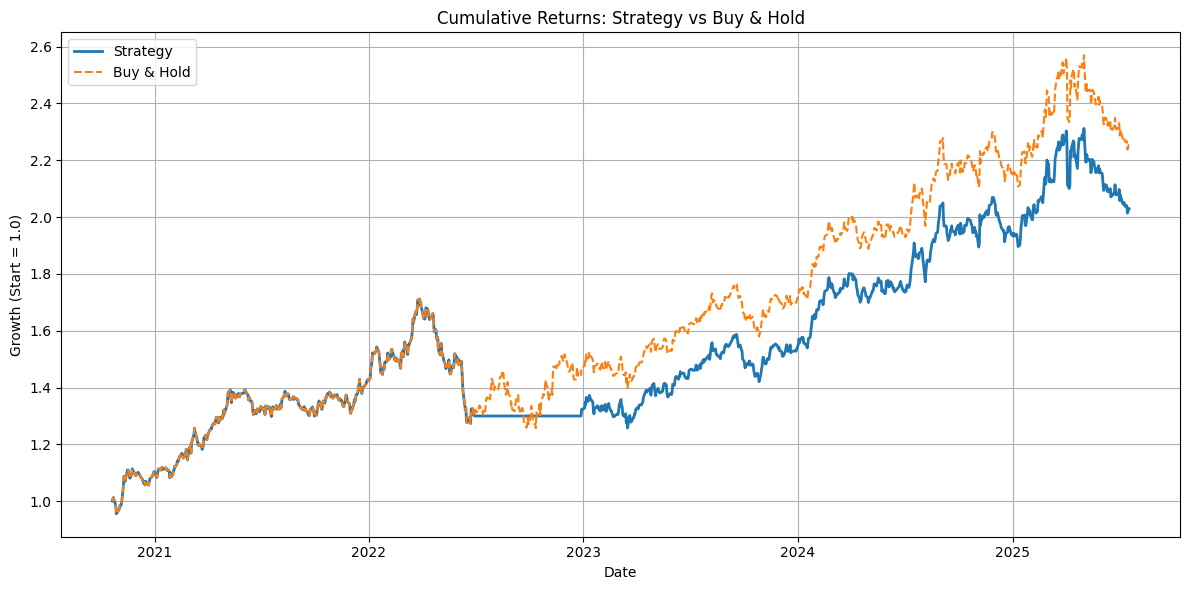

/tmp/ipython-input-3-3871942033.py:30: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(ticker, start=start.strftime('%Y-%m-%d'), end=end.strftime('%Y-%m-%d'))  # Download historical daily price data from Yahoo Finance
[*********************100%***********************]  1 of 1 completed



Running backtest for TQQQ

Backtest Results:
Strategy Total Return: 181.00%
Buy & Hold Return: 160.69%


/tmp/ipython-input-3-3871942033.py:30: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(ticker, start=start.strftime('%Y-%m-%d'), end=end.strftime('%Y-%m-%d'))  # Download historical daily price data from Yahoo Finance
[*********************100%***********************]  1 of 1 completed



Running backtest for AMZN

Backtest Results:
Strategy Total Return: 25.65%
Buy & Hold Return: 40.58%


/tmp/ipython-input-3-3871942033.py:30: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(ticker, start=start.strftime('%Y-%m-%d'), end=end.strftime('%Y-%m-%d'))  # Download historical daily price data from Yahoo Finance
[*********************100%***********************]  1 of 1 completed



Running backtest for TSLA

Backtest Results:
Strategy Total Return: 32.25%
Buy & Hold Return: 134.38%


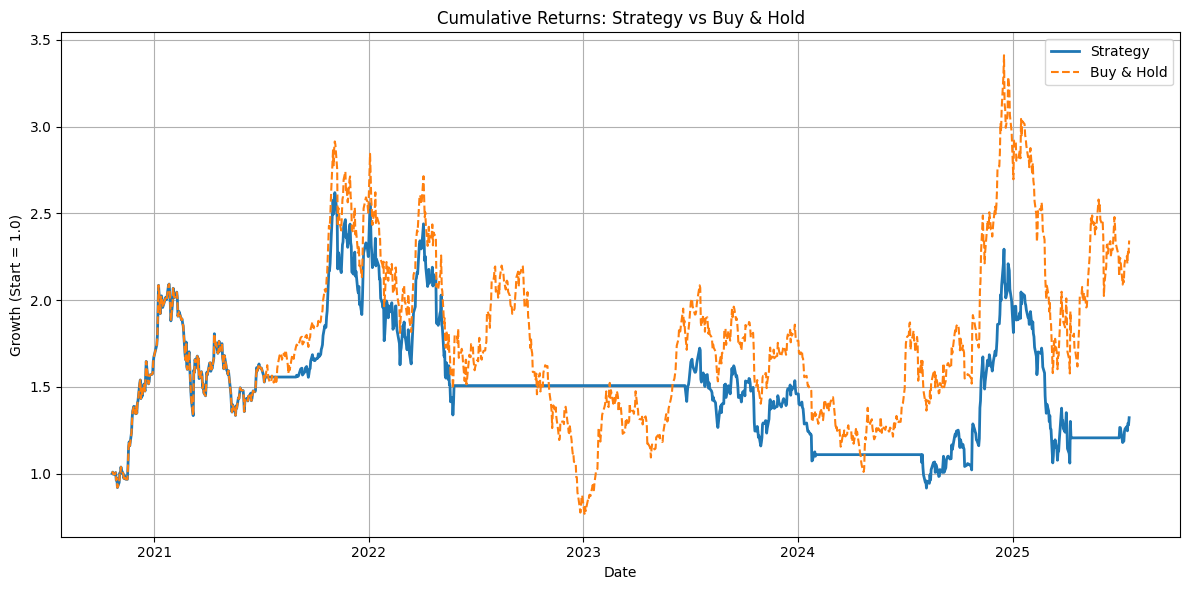

/tmp/ipython-input-3-3871942033.py:30: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(ticker, start=start.strftime('%Y-%m-%d'), end=end.strftime('%Y-%m-%d'))  # Download historical daily price data from Yahoo Finance
[*********************100%***********************]  1 of 1 completed



Running backtest for VTI

Backtest Results:
Strategy Total Return: 66.24%
Buy & Hold Return: 88.56%


/tmp/ipython-input-3-3871942033.py:30: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(ticker, start=start.strftime('%Y-%m-%d'), end=end.strftime('%Y-%m-%d'))  # Download historical daily price data from Yahoo Finance
[*********************100%***********************]  1 of 1 completed



Running backtest for NVDA

Backtest Results:
Strategy Total Return: 960.90%
Buy & Hold Return: 1167.28%


/tmp/ipython-input-3-3871942033.py:30: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(ticker, start=start.strftime('%Y-%m-%d'), end=end.strftime('%Y-%m-%d'))  # Download historical daily price data from Yahoo Finance
[*********************100%***********************]  1 of 1 completed



Running backtest for GOOGL

Backtest Results:
Strategy Total Return: 137.29%
Buy & Hold Return: 140.05%


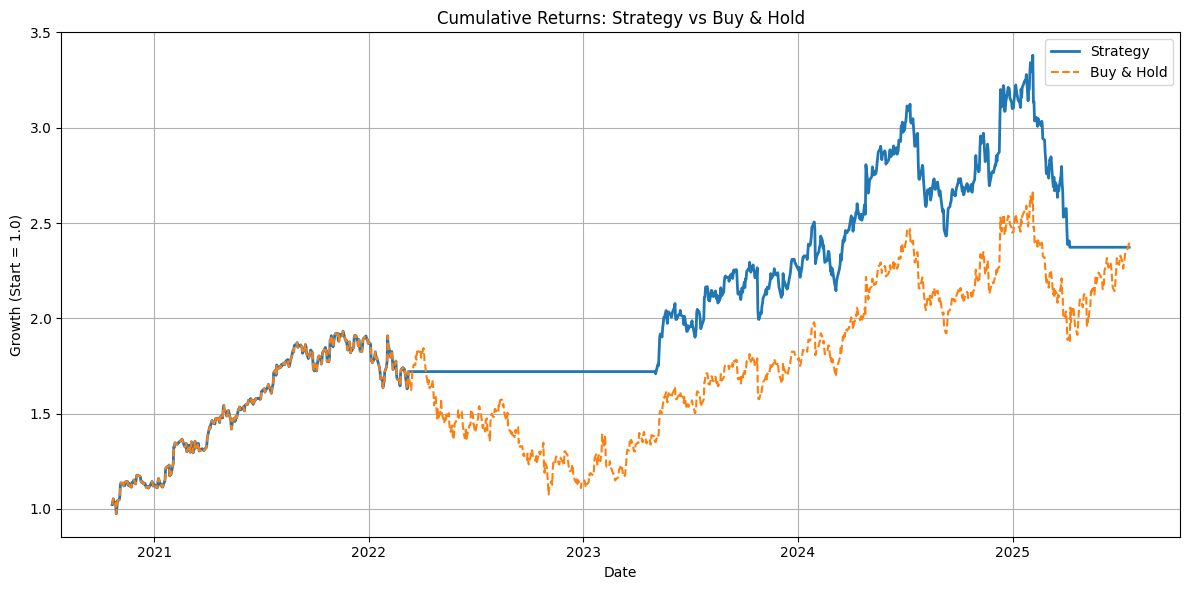

/tmp/ipython-input-3-3871942033.py:30: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(ticker, start=start.strftime('%Y-%m-%d'), end=end.strftime('%Y-%m-%d'))  # Download historical daily price data from Yahoo Finance
[*********************100%***********************]  1 of 1 completed



Running backtest for AAPL

Backtest Results:
Strategy Total Return: 8.80%
Buy & Hold Return: 84.54%


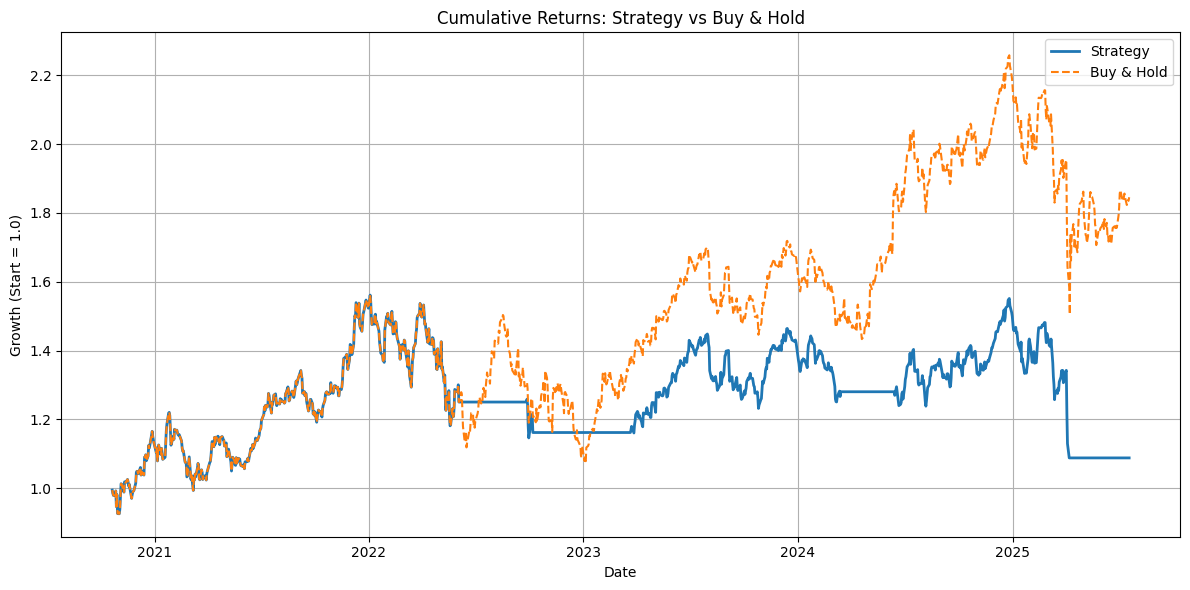

/tmp/ipython-input-3-3871942033.py:30: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(ticker, start=start.strftime('%Y-%m-%d'), end=end.strftime('%Y-%m-%d'))  # Download historical daily price data from Yahoo Finance
[*********************100%***********************]  1 of 1 completed
/tmp/ipython-input-3-3871942033.py:30: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(ticker, start=start.strftime('%Y-%m-%d'), end=end.strftime('%Y-%m-%d'))  # Download historical daily price data from Yahoo Finance
[*********************100%***********************]  1 of 1 completed



Running backtest for QBIG
Not enough data after generating signals.


Running backtest for VB

Backtest Results:
Strategy Total Return: 3.93%
Buy & Hold Return: 58.91%


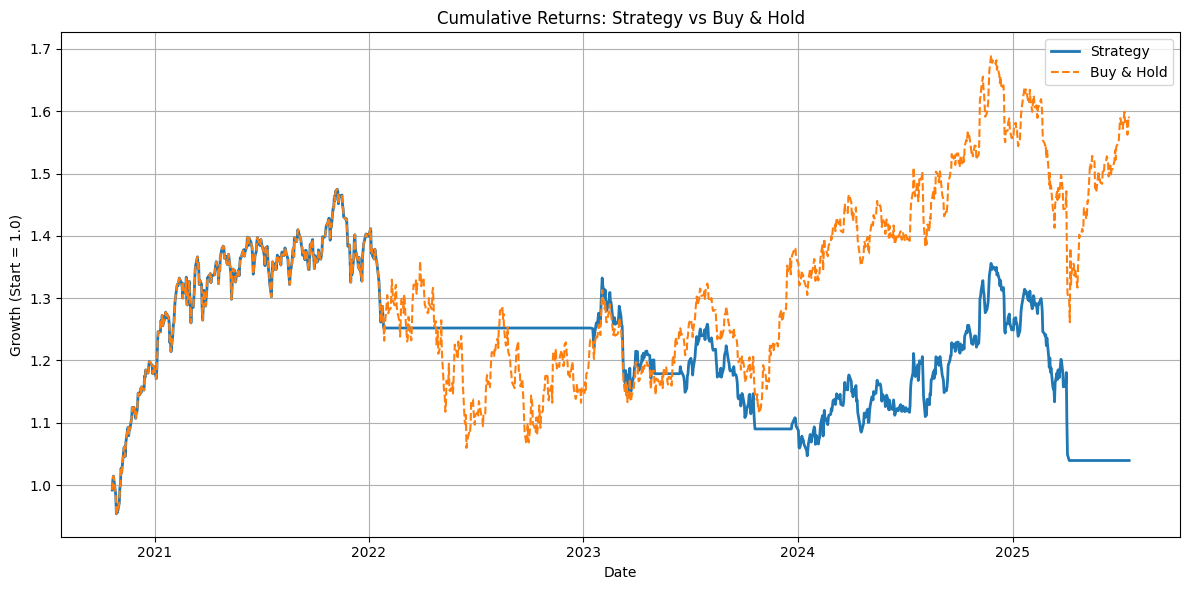

/tmp/ipython-input-3-3871942033.py:30: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(ticker, start=start.strftime('%Y-%m-%d'), end=end.strftime('%Y-%m-%d'))  # Download historical daily price data from Yahoo Finance
[*********************100%***********************]  1 of 1 completed



Running backtest for META

Backtest Results:
Strategy Total Return: 317.96%
Buy & Hold Return: 164.67%


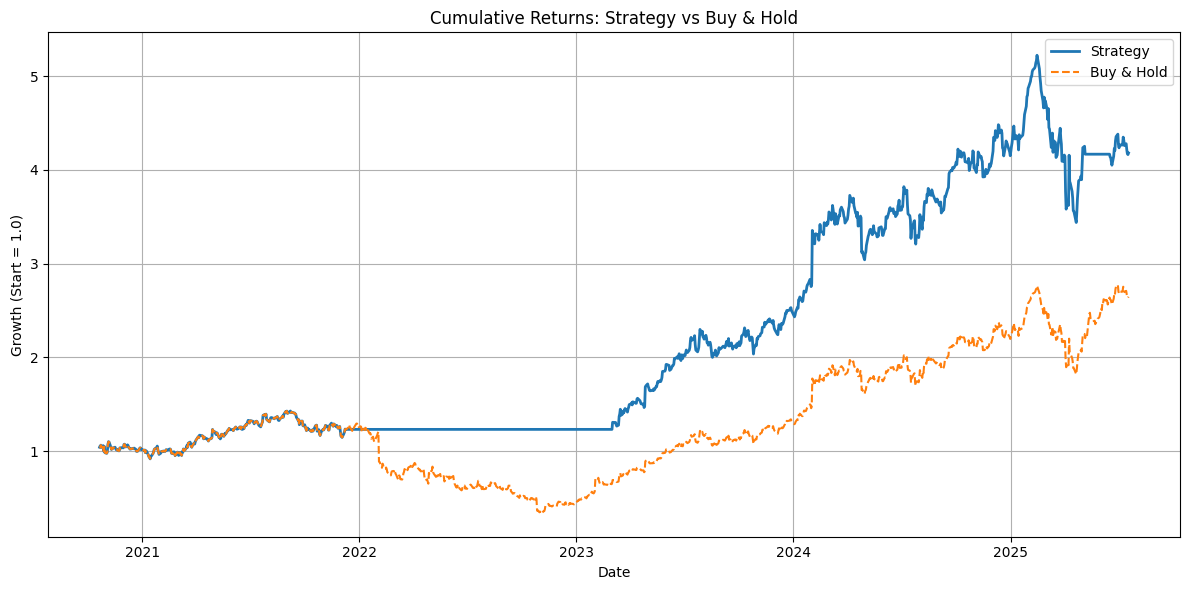

/tmp/ipython-input-3-3871942033.py:30: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(ticker, start=start.strftime('%Y-%m-%d'), end=end.strftime('%Y-%m-%d'))  # Download historical daily price data from Yahoo Finance
[*********************100%***********************]  1 of 1 completed



Running backtest for MSFT

Backtest Results:
Strategy Total Return: 110.91%
Buy & Hold Return: 147.42%


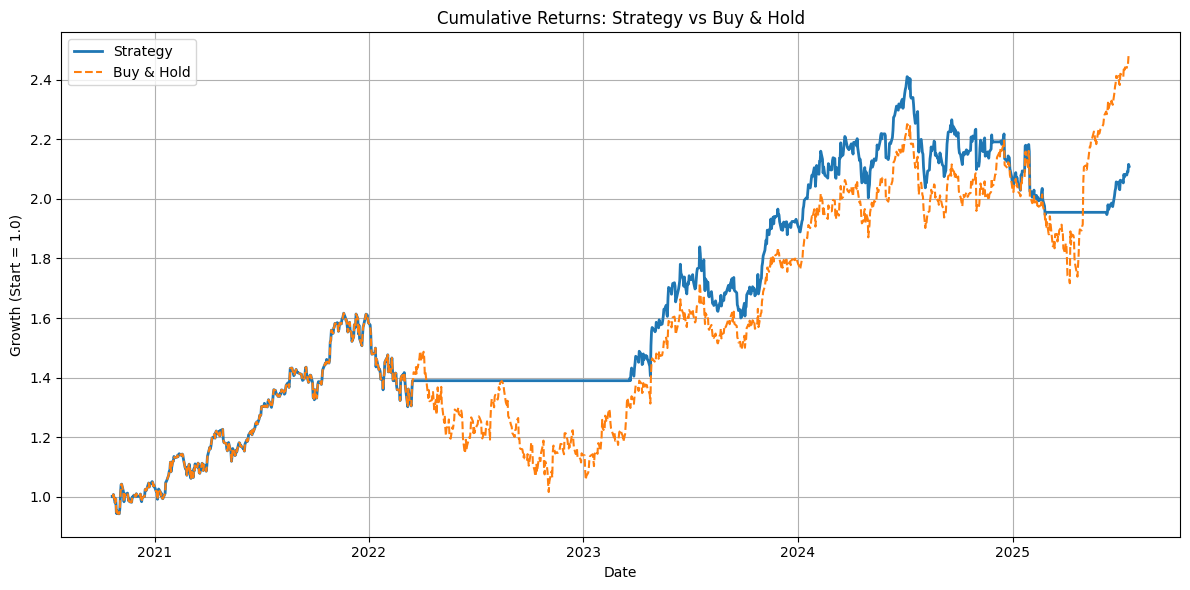

/tmp/ipython-input-3-3871942033.py:30: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(ticker, start=start.strftime('%Y-%m-%d'), end=end.strftime('%Y-%m-%d'))  # Download historical daily price data from Yahoo Finance
[*********************100%***********************]  1 of 1 completed



Running backtest for GS

Backtest Results:
Strategy Total Return: 163.21%
Buy & Hold Return: 281.55%


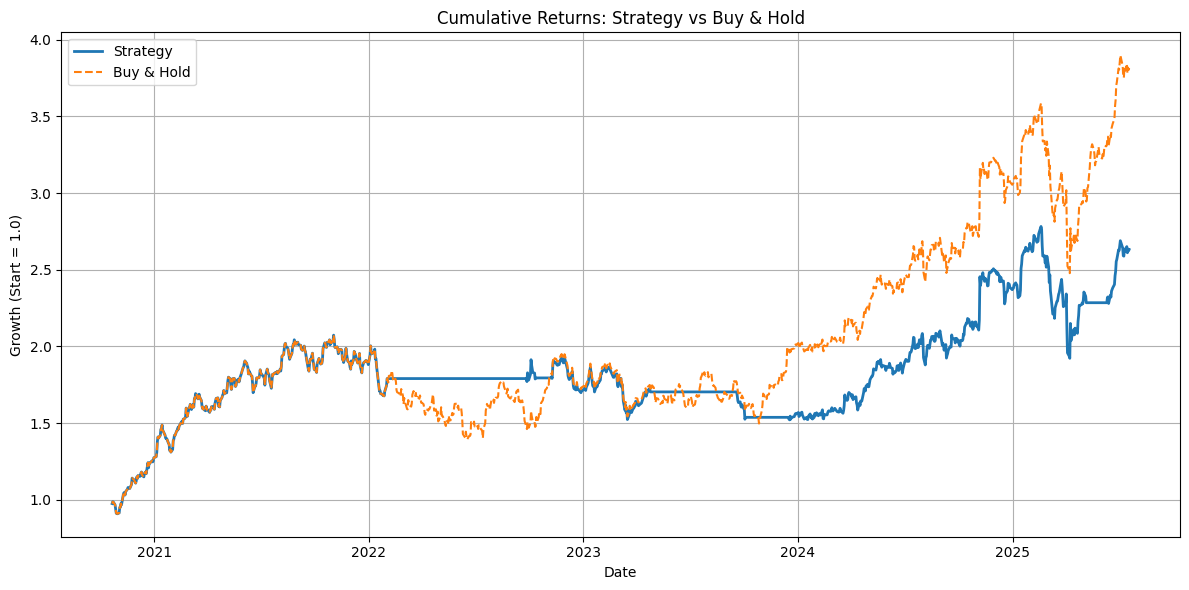

/tmp/ipython-input-3-3871942033.py:30: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(ticker, start=start.strftime('%Y-%m-%d'), end=end.strftime('%Y-%m-%d'))  # Download historical daily price data from Yahoo Finance
[*********************100%***********************]  1 of 1 completed



Running backtest for BLK

Backtest Results:
Strategy Total Return: 28.01%
Buy & Hold Return: 92.01%


/tmp/ipython-input-3-3871942033.py:30: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(ticker, start=start.strftime('%Y-%m-%d'), end=end.strftime('%Y-%m-%d'))  # Download historical daily price data from Yahoo Finance
[*********************100%***********************]  1 of 1 completed



Running backtest for JPM

Backtest Results:
Strategy Total Return: 213.58%
Buy & Hold Return: 228.82%


/tmp/ipython-input-3-3871942033.py:30: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(ticker, start=start.strftime('%Y-%m-%d'), end=end.strftime('%Y-%m-%d'))  # Download historical daily price data from Yahoo Finance
[*********************100%***********************]  1 of 1 completed



Running backtest for COST

Backtest Results:
Strategy Total Return: 100.34%
Buy & Hold Return: 172.39%


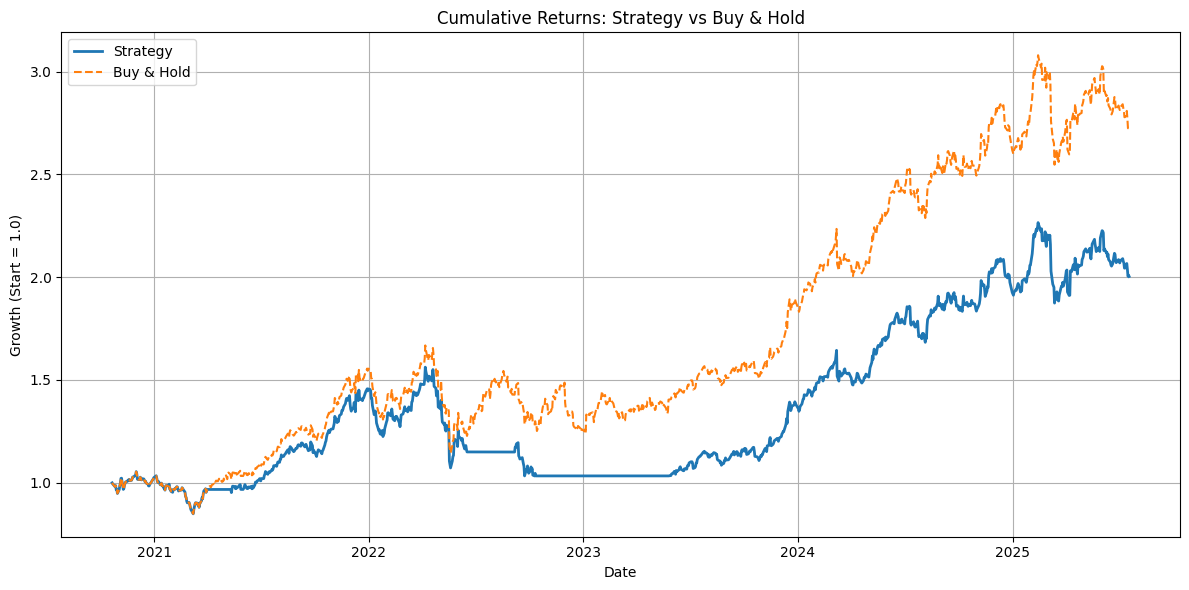

/tmp/ipython-input-3-3871942033.py:30: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(ticker, start=start.strftime('%Y-%m-%d'), end=end.strftime('%Y-%m-%d'))  # Download historical daily price data from Yahoo Finance
[*********************100%***********************]  1 of 1 completed



Running backtest for SOFI

Backtest Results:
Strategy Total Return: 7.03%
Buy & Hold Return: 7.86%


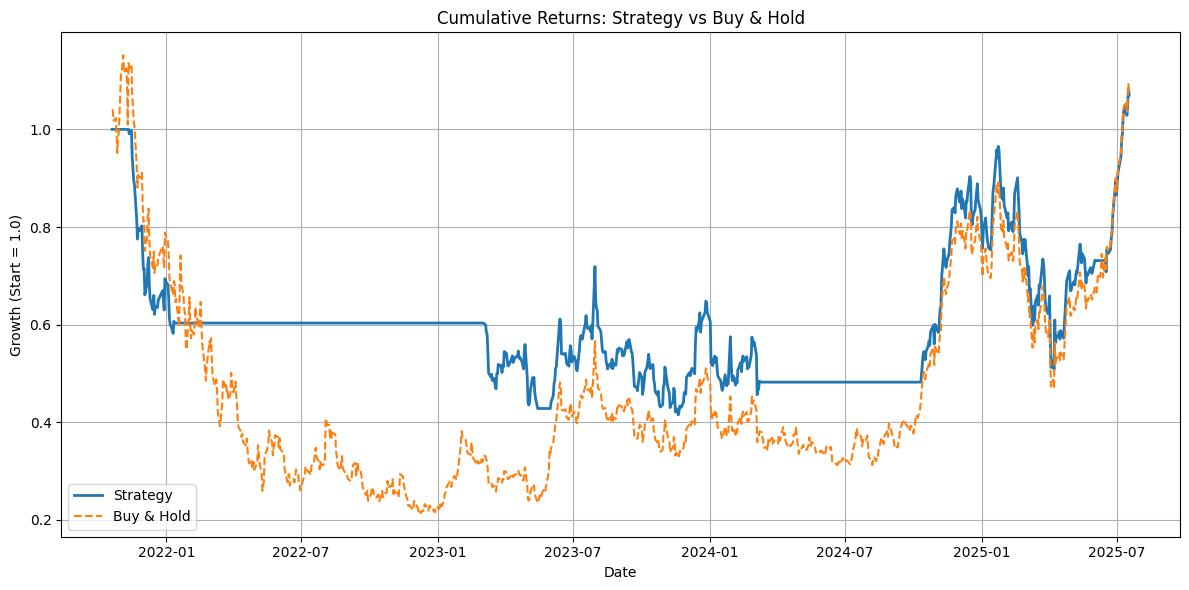

/tmp/ipython-input-3-3871942033.py:30: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(ticker, start=start.strftime('%Y-%m-%d'), end=end.strftime('%Y-%m-%d'))  # Download historical daily price data from Yahoo Finance
[*********************100%***********************]  1 of 1 completed



Running backtest for IBIT

Backtest Results:
Strategy Total Return: 68.09%
Buy & Hold Return: 68.09%


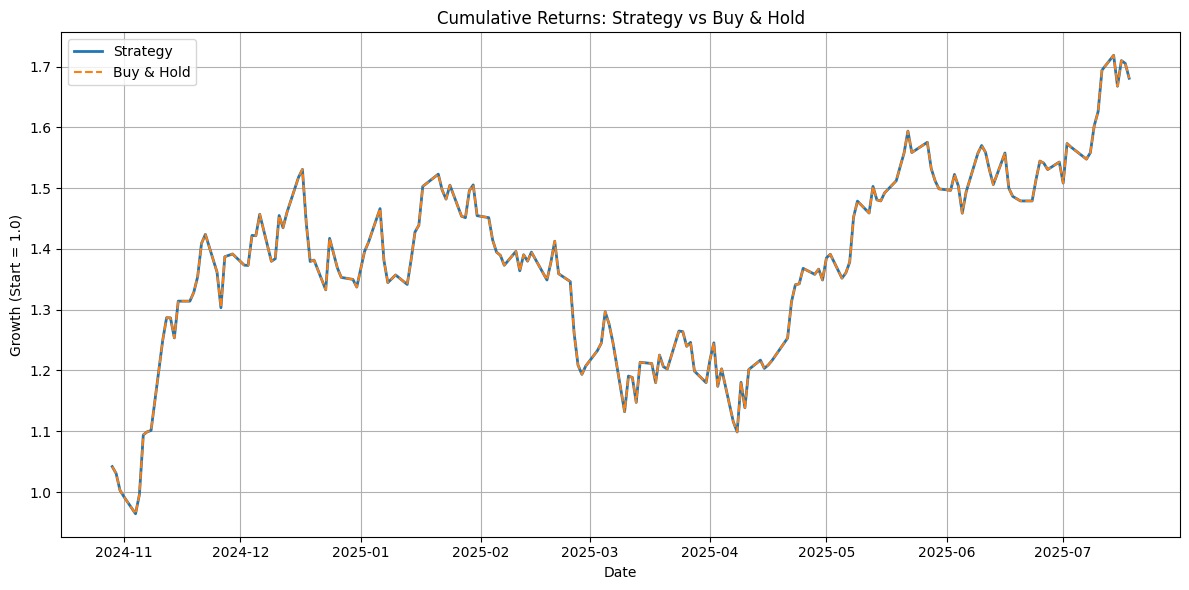

/tmp/ipython-input-3-3871942033.py:30: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(ticker, start=start.strftime('%Y-%m-%d'), end=end.strftime('%Y-%m-%d'))  # Download historical daily price data from Yahoo Finance
[*********************100%***********************]  1 of 1 completed



Running backtest for BITO

Backtest Results:
Strategy Total Return: 172.84%
Buy & Hold Return: 316.18%


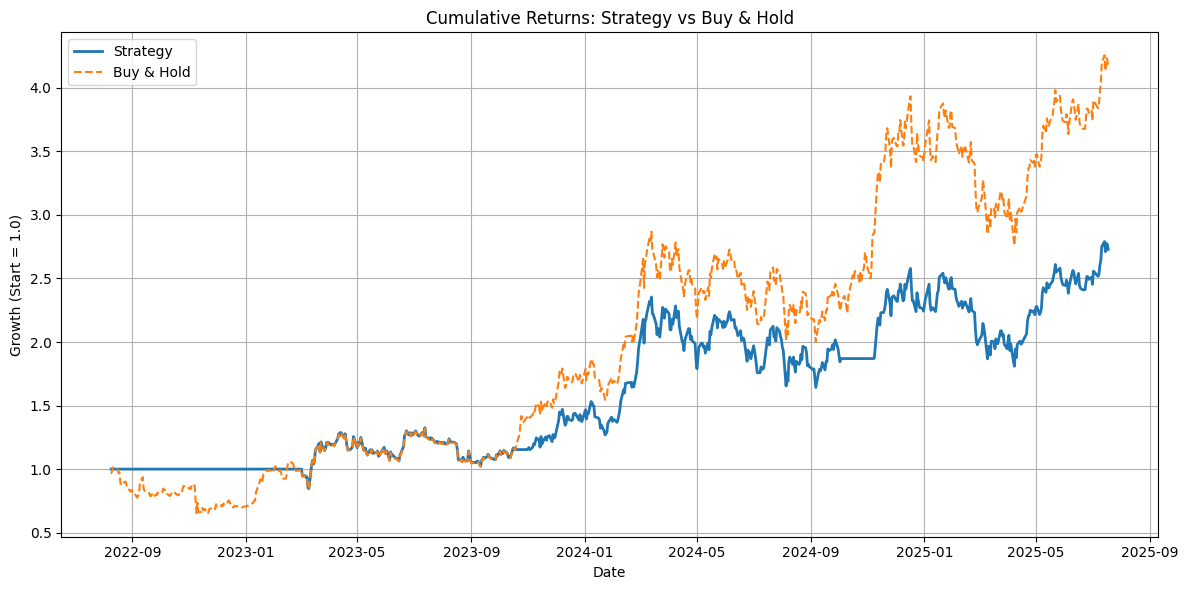

/tmp/ipython-input-3-3871942033.py:30: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(ticker, start=start.strftime('%Y-%m-%d'), end=end.strftime('%Y-%m-%d'))  # Download historical daily price data from Yahoo Finance
[*********************100%***********************]  1 of 1 completed



Running backtest for PTON

Backtest Results:
Strategy Total Return: -47.77%
Buy & Hold Return: -95.23%


/tmp/ipython-input-3-3871942033.py:30: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(ticker, start=start.strftime('%Y-%m-%d'), end=end.strftime('%Y-%m-%d'))  # Download historical daily price data from Yahoo Finance
[*********************100%***********************]  1 of 1 completed



Running backtest for YETI

Backtest Results:
Strategy Total Return: -13.23%
Buy & Hold Return: -31.68%


/tmp/ipython-input-3-3871942033.py:30: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(ticker, start=start.strftime('%Y-%m-%d'), end=end.strftime('%Y-%m-%d'))  # Download historical daily price data from Yahoo Finance
[*********************100%***********************]  1 of 1 completed



Running backtest for VNQ

Backtest Results:
Strategy Total Return: 4.59%
Buy & Hold Return: 34.79%


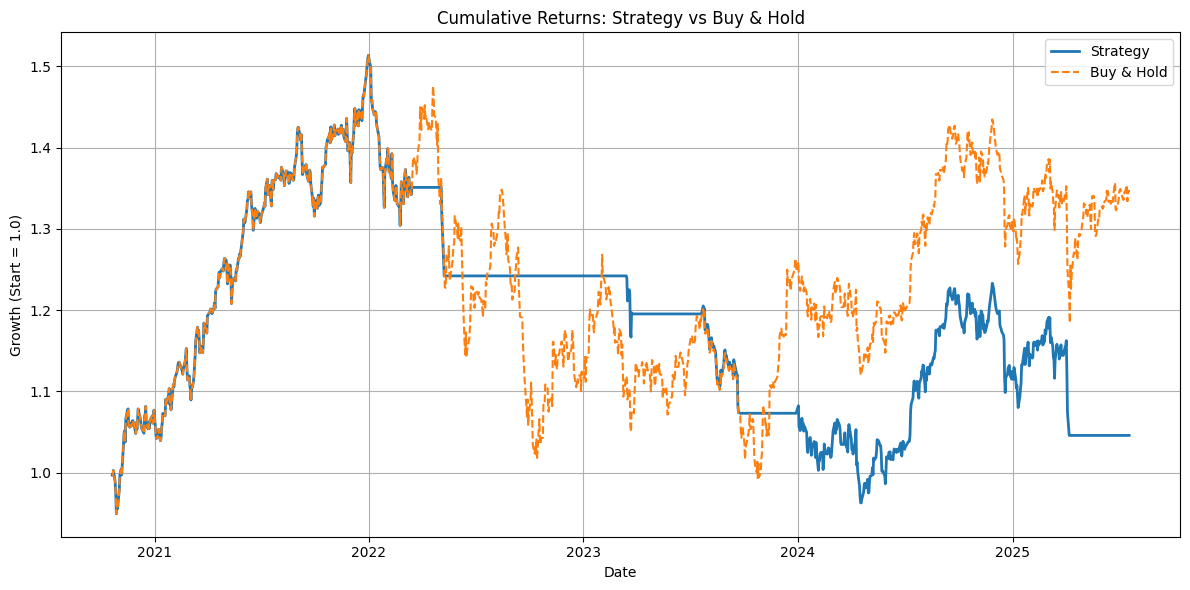

In [4]:
# ========================
# INPUT STOCK TICKERS HERE
# ========================
tickers = ['QQQ', 'VOO', 'DIA', 'BRK-B', 'TQQQ', 'AMZN', 'TSLA', 'VTI', 'NVDA', 'GOOGL', 'AAPL', 'QBIG', 'VB', 'META', 'MSFT', 'GS', 'BLK', 'JPM', 'COST',
           'SOFI', 'IBIT', 'BITO', 'PTON', 'YETI', 'VNQ']  # ← Add or remove tickers here

# Call the function to analyze each stock
for ticker in tickers:
    run_quant_model(ticker)

In [5]:
# Adding more parameters

import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime, timedelta

# ----------------------------------------
# STEP 1: Download historical price data
# ----------------------------------------

def get_data(ticker):
    end = datetime.today()
    start = end - timedelta(days=5*365 + 30)  # approx. 5 years
    df = yf.download(ticker, start=start.strftime('%Y-%m-%d'), end=end.strftime('%Y-%m-%d'))
    return df

# ----------------------------------------
# STEP 2: Generate 50-day and 200-day SMAs + trading signals
# ----------------------------------------

def generate_signals(df):
    # Simple Moving Averages
    # SMA_t = (P_t + P_{t-1} + ... + P_{t-N+1}) / N
    df['SMA_50'] = df['Close'].rolling(window=50).mean()
    df['SMA_200'] = df['Close'].rolling(window=200).mean()

    df.dropna(inplace=True)

    # Trading signal: 1 if SMA_50 > SMA_200 (bullish), 0 otherwise (bearish/neutral)
    df['Signal'] = 0
    df.loc[df['SMA_50'] > df['SMA_200'], 'Signal'] = 1

    # We enter position based on yesterday’s signal
    df['Position'] = df['Signal'].shift(1).fillna(0)

    return df

# ----------------------------------------
# STEP 3: Backtest the strategy and report performance
# ----------------------------------------

def performance_report(df, initial_capital=10000, trading_cost=0.001):
    # Daily returns: R_t = (P_t / P_{t-1}) - 1
    df['Daily Return'] = df['Close'].pct_change().fillna(0)

    # Strategy return: R_strat = Signal_{t-1} * R_t
    # You only get return if you were in position the previous day
    df['Strategy Return'] = df['Position'] * df['Daily Return']

    # --- Slippage + Transaction Cost ---
    # Assumes 0.1% cost per trade (i.e. when position changes)
    df['Trade'] = df['Position'].diff().fillna(0).abs()
    df['Strategy Return Net'] = df['Strategy Return'] - df['Trade'] * trading_cost

    # --- Portfolio Value Over Time ---
    # Cumulative product simulates compound growth over time
    df['Portfolio Value'] = (1 + df['Strategy Return Net']).cumprod() * initial_capital
    df['Buy & Hold'] = (1 + df['Daily Return']).cumprod() * initial_capital

    # -------- PERFORMANCE METRICS --------

    # Total Return: (V_final / V_start) - 1
    total_return = df['Portfolio Value'].iloc[-1] / initial_capital - 1
    bh_return = df['Buy & Hold'].iloc[-1] / initial_capital - 1

    # CAGR (Compound Annual Growth Rate)
    # CAGR = (Final Value / Initial)^(1 / T_years) - 1
    trading_days = 252
    years = len(df) / trading_days
    cagr = (df['Portfolio Value'].iloc[-1] / initial_capital) ** (1 / years) - 1

    # Annualized Volatility
    # std(R) * sqrt(252)
    volatility = df['Strategy Return Net'].std() * np.sqrt(trading_days)

    # Sharpe Ratio: (mean(R) - R_f) / std(R)
    # Assuming R_f = 0 (no risk-free return for simplicity)
    sharpe = (df['Strategy Return Net'].mean() / df['Strategy Return Net'].std()) * np.sqrt(trading_days)

    # Max Drawdown = min(Portfolio / Running_Max - 1)
    cum_returns = (1 + df['Strategy Return Net']).cumprod()
    roll_max = cum_returns.cummax()
    drawdown = (cum_returns - roll_max) / roll_max
    max_dd = drawdown.min()

    # ----------- PRINT REPORT -----------
    print(f"==== Performance Report ====\n")
    print(f"Total Return (Strategy):                               {total_return*100:.2f}%")
    print(f"Total Return (Buy & Hold):                             {bh_return*100:.2f}%")
    print(f"CAGR (Compound Annual Growth Rate):                    {cagr*100:.2f}%")
    print(f"Annualized Volatility (std(R)*sqrt(trading_days=252)): {volatility*100:.2f}%")
    print(f"Sharpe Ratio (mean(R)-R_f / std(R)):                   {sharpe:.2f}")
    print(f"Max Drawdown (min(Portfolio / Running_Max - 1)):       {max_dd*100:.2f}%")

    # ----------- PLOT -----------
    plt.figure(figsize=(12, 6))
    plt.plot(df.index, df['Portfolio Value'], label='SMA Crossover Strategy', linewidth=2)
    plt.plot(df.index, df['Buy & Hold'], label='Buy & Hold', linestyle='--')
    plt.title("Strategy vs Buy & Hold: Portfolio Growth")
    plt.xlabel("Date")
    plt.ylabel("Portfolio Value ($)")
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()

# ----------------------------------------
# STEP 4: Wrap all in one function
# ----------------------------------------

def run_quant_pipeline(ticker):
    print(f"\n\nAnalyzing {ticker}...\n")
    df = get_data(ticker)
    if df.empty:
        print("No data found.")
        return
    df = generate_signals(df)
    if df.empty:
        print("Not enough data after generating signals.")
        return
    performance_report(df)



Analyzing QQQ...



/tmp/ipython-input-5-2519254297.py:16: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(ticker, start=start.strftime('%Y-%m-%d'), end=end.strftime('%Y-%m-%d'))
[*********************100%***********************]  1 of 1 completed


==== Performance Report ====

Total Return (Strategy):                               77.52%
Total Return (Buy & Hold):                             73.76%
CAGR (Compound Annual Growth Rate):                    14.39%
Annualized Volatility (std(R)*sqrt(trading_days=252)): 17.02%
Sharpe Ratio (mean(R)-R_f / std(R)):                   0.87
Max Drawdown (min(Portfolio / Running_Max - 1)):       -22.77%


/tmp/ipython-input-5-2519254297.py:16: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(ticker, start=start.strftime('%Y-%m-%d'), end=end.strftime('%Y-%m-%d'))
[*********************100%***********************]  1 of 1 completed



Analyzing VOO...

==== Performance Report ====

Total Return (Strategy):                               47.65%
Total Return (Buy & Hold):                             64.32%
CAGR (Compound Annual Growth Rate):                    9.55%
Annualized Volatility (std(R)*sqrt(trading_days=252)): 13.23%
Sharpe Ratio (mean(R)-R_f / std(R)):                   0.76
Max Drawdown (min(Portfolio / Running_Max - 1)):       -18.69%




Analyzing DIA...



/tmp/ipython-input-5-2519254297.py:16: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(ticker, start=start.strftime('%Y-%m-%d'), end=end.strftime('%Y-%m-%d'))
[*********************100%***********************]  1 of 1 completed


==== Performance Report ====

Total Return (Strategy):                               18.54%
Total Return (Buy & Hold):                             42.73%
CAGR (Compound Annual Growth Rate):                    4.06%
Annualized Volatility (std(R)*sqrt(trading_days=252)): 12.03%
Sharpe Ratio (mean(R)-R_f / std(R)):                   0.39
Max Drawdown (min(Portfolio / Running_Max - 1)):       -15.95%


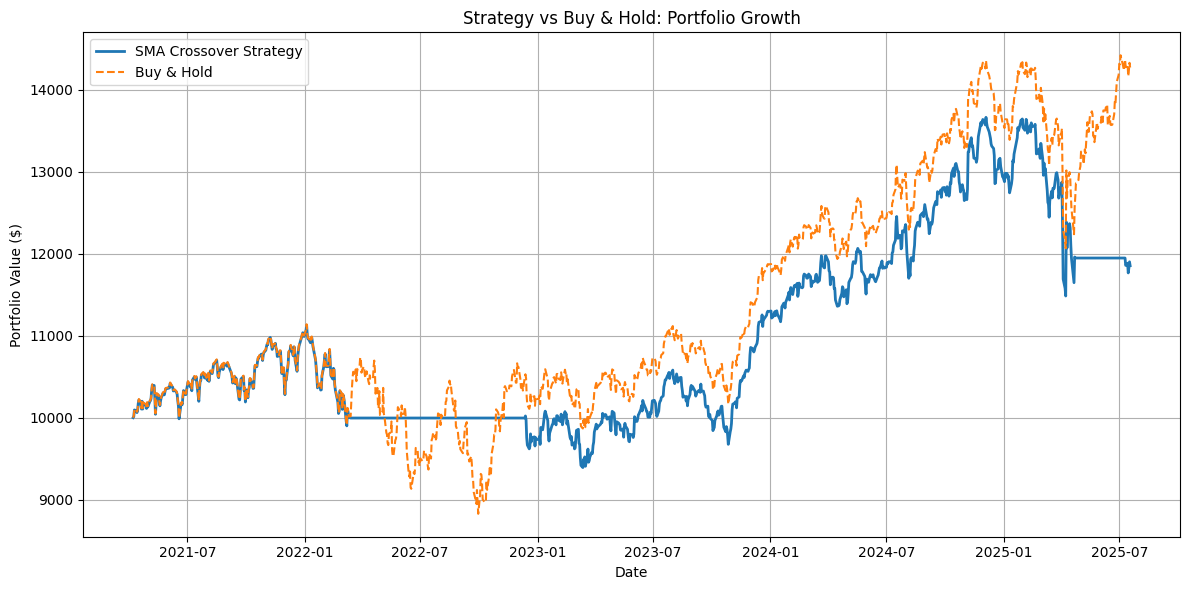

/tmp/ipython-input-5-2519254297.py:16: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(ticker, start=start.strftime('%Y-%m-%d'), end=end.strftime('%Y-%m-%d'))
[*********************100%***********************]  1 of 1 completed



Analyzing BRK-B...



==== Performance Report ====

Total Return (Strategy):                               61.23%
Total Return (Buy & Hold):                             79.73%
CAGR (Compound Annual Growth Rate):                    11.84%
Annualized Volatility (std(R)*sqrt(trading_days=252)): 15.65%
Sharpe Ratio (mean(R)-R_f / std(R)):                   0.79
Max Drawdown (min(Portfolio / Running_Max - 1)):       -26.70%


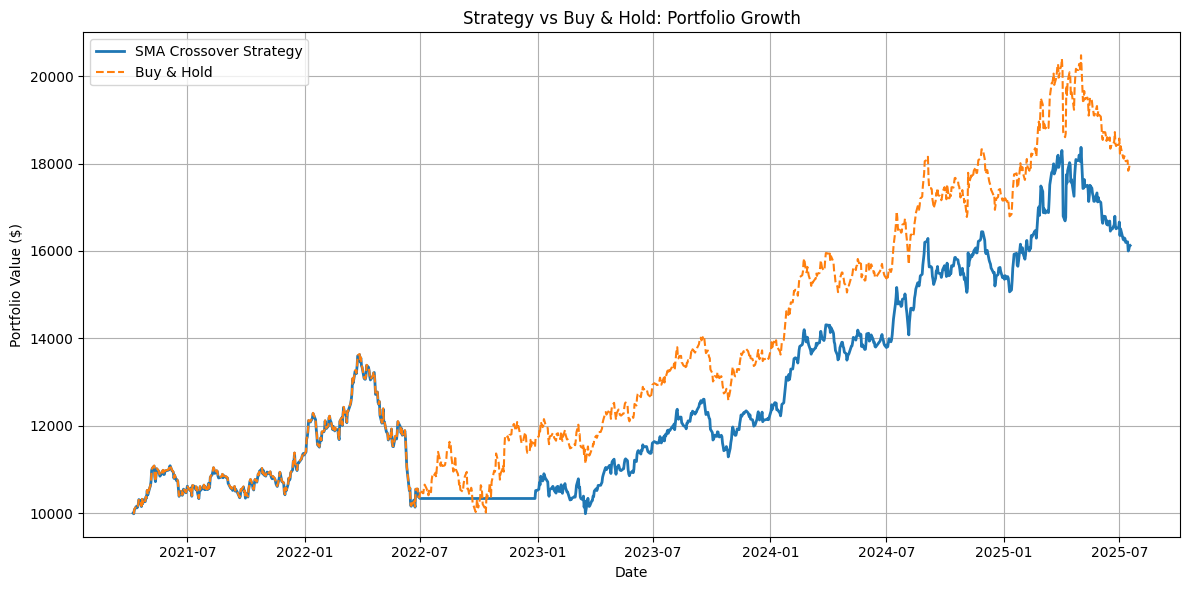



Analyzing TQQQ...



/tmp/ipython-input-5-2519254297.py:16: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(ticker, start=start.strftime('%Y-%m-%d'), end=end.strftime('%Y-%m-%d'))
[*********************100%***********************]  1 of 1 completed


==== Performance Report ====

Total Return (Strategy):                               89.90%
Total Return (Buy & Hold):                             77.05%
CAGR (Compound Annual Growth Rate):                    16.21%
Annualized Volatility (std(R)*sqrt(trading_days=252)): 45.27%
Sharpe Ratio (mean(R)-R_f / std(R)):                   0.56
Max Drawdown (min(Portfolio / Running_Max - 1)):       -49.03%


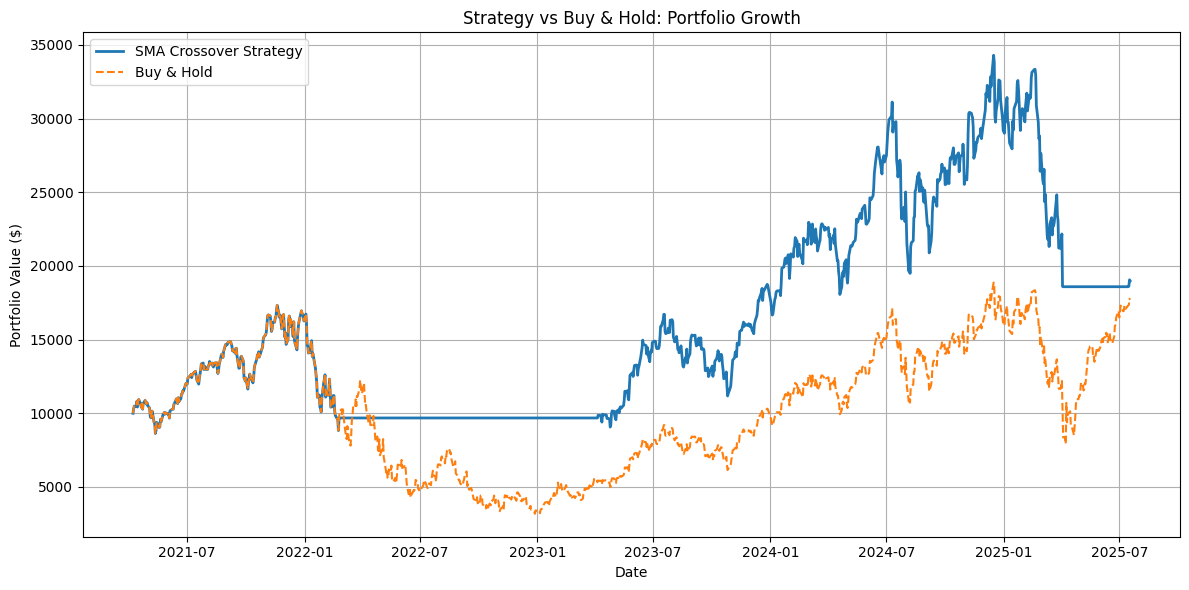



Analyzing AMZN...



/tmp/ipython-input-5-2519254297.py:16: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(ticker, start=start.strftime('%Y-%m-%d'), end=end.strftime('%Y-%m-%d'))
[*********************100%***********************]  1 of 1 completed


==== Performance Report ====

Total Return (Strategy):                               22.41%
Total Return (Buy & Hold):                             37.91%
CAGR (Compound Annual Growth Rate):                    4.85%
Annualized Volatility (std(R)*sqrt(trading_days=252)): 23.35%
Sharpe Ratio (mean(R)-R_f / std(R)):                   0.32
Max Drawdown (min(Portfolio / Running_Max - 1)):       -30.88%


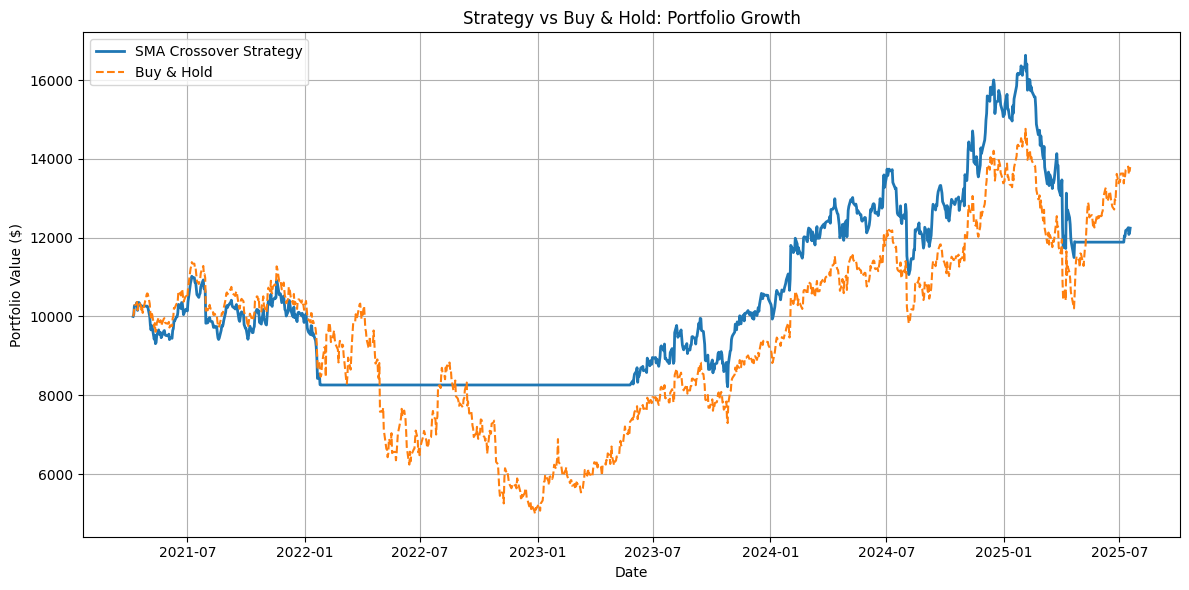



Analyzing TSLA...



/tmp/ipython-input-5-2519254297.py:16: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(ticker, start=start.strftime('%Y-%m-%d'), end=end.strftime('%Y-%m-%d'))
[*********************100%***********************]  1 of 1 completed


==== Performance Report ====

Total Return (Strategy):                               -17.58%
Total Return (Buy & Hold):                             47.39%
CAGR (Compound Annual Growth Rate):                    -4.43%
Annualized Volatility (std(R)*sqrt(trading_days=252)): 46.67%
Sharpe Ratio (mean(R)-R_f / std(R)):                   0.13
Max Drawdown (min(Portfolio / Running_Max - 1)):       -65.15%


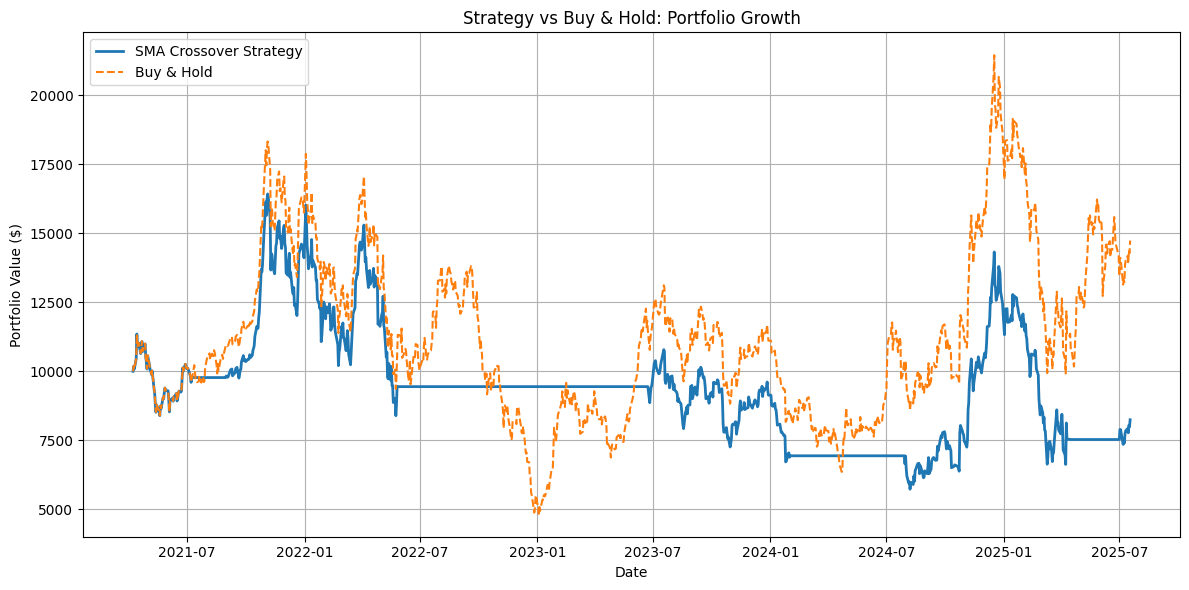



Analyzing VTI...



/tmp/ipython-input-5-2519254297.py:16: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(ticker, start=start.strftime('%Y-%m-%d'), end=end.strftime('%Y-%m-%d'))
[*********************100%***********************]  1 of 1 completed


==== Performance Report ====

Total Return (Strategy):                               36.26%
Total Return (Buy & Hold):                             55.33%
CAGR (Compound Annual Growth Rate):                    7.51%
Annualized Volatility (std(R)*sqrt(trading_days=252)): 13.60%
Sharpe Ratio (mean(R)-R_f / std(R)):                   0.60
Max Drawdown (min(Portfolio / Running_Max - 1)):       -19.30%


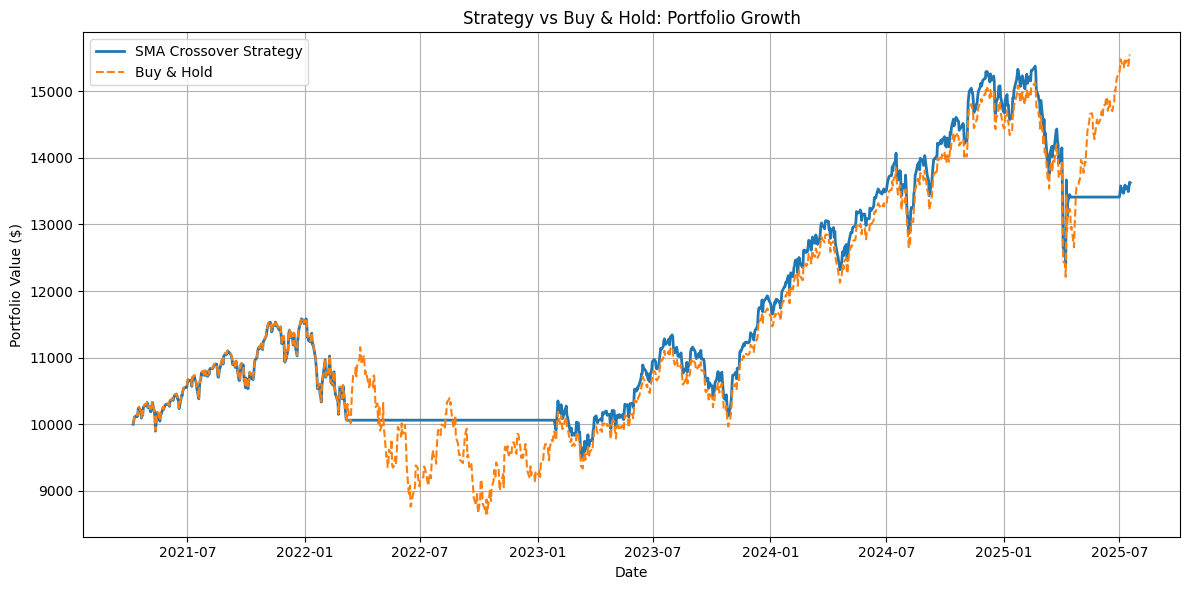



Analyzing NVDA...



/tmp/ipython-input-5-2519254297.py:16: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(ticker, start=start.strftime('%Y-%m-%d'), end=end.strftime('%Y-%m-%d'))
[*********************100%***********************]  1 of 1 completed


==== Performance Report ====

Total Return (Strategy):                               917.80%
Total Return (Buy & Hold):                             1121.87%
CAGR (Compound Annual Growth Rate):                    72.19%
Annualized Volatility (std(R)*sqrt(trading_days=252)): 44.90%
Sharpe Ratio (mean(R)-R_f / std(R)):                   1.43
Max Drawdown (min(Portfolio / Running_Max - 1)):       -36.29%


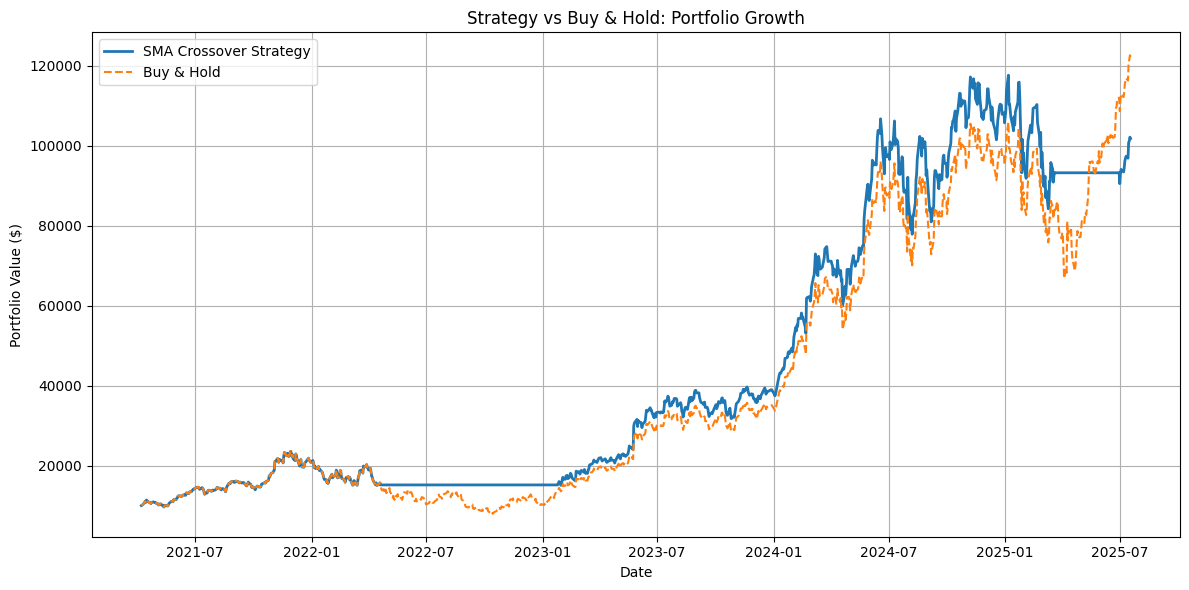



Analyzing GOOG...



/tmp/ipython-input-5-2519254297.py:16: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(ticker, start=start.strftime('%Y-%m-%d'), end=end.strftime('%Y-%m-%d'))
[*********************100%***********************]  1 of 1 completed


==== Performance Report ====

Total Return (Strategy):                               62.36%
Total Return (Buy & Hold):                             66.29%
CAGR (Compound Annual Growth Rate):                    12.02%
Annualized Volatility (std(R)*sqrt(trading_days=252)): 21.96%
Sharpe Ratio (mean(R)-R_f / std(R)):                   0.63
Max Drawdown (min(Portfolio / Running_Max - 1)):       -29.42%




Analyzing AAPL...



/tmp/ipython-input-5-2519254297.py:16: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(ticker, start=start.strftime('%Y-%m-%d'), end=end.strftime('%Y-%m-%d'))
[*********************100%***********************]  1 of 1 completed


==== Performance Report ====

Total Return (Strategy):                               -1.15%
Total Return (Buy & Hold):                             69.01%
CAGR (Compound Annual Growth Rate):                    -0.27%
Annualized Volatility (std(R)*sqrt(trading_days=252)): 21.05%
Sharpe Ratio (mean(R)-R_f / std(R)):                   0.09
Max Drawdown (min(Portfolio / Running_Max - 1)):       -30.79%


/tmp/ipython-input-5-2519254297.py:16: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(ticker, start=start.strftime('%Y-%m-%d'), end=end.strftime('%Y-%m-%d'))
[*********************100%***********************]  1 of 1 completed



Analyzing QBIG...

Not enough data after generating signals.


Analyzing VB...




/tmp/ipython-input-5-2519254297.py:16: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(ticker, start=start.strftime('%Y-%m-%d'), end=end.strftime('%Y-%m-%d'))
[*********************100%***********************]  1 of 1 completed


==== Performance Report ====

Total Return (Strategy):                               -22.16%
Total Return (Buy & Hold):                             19.96%
CAGR (Compound Annual Growth Rate):                    -5.70%
Annualized Volatility (std(R)*sqrt(trading_days=252)): 14.49%
Sharpe Ratio (mean(R)-R_f / std(R)):                   -0.33
Max Drawdown (min(Portfolio / Running_Max - 1)):       -30.02%


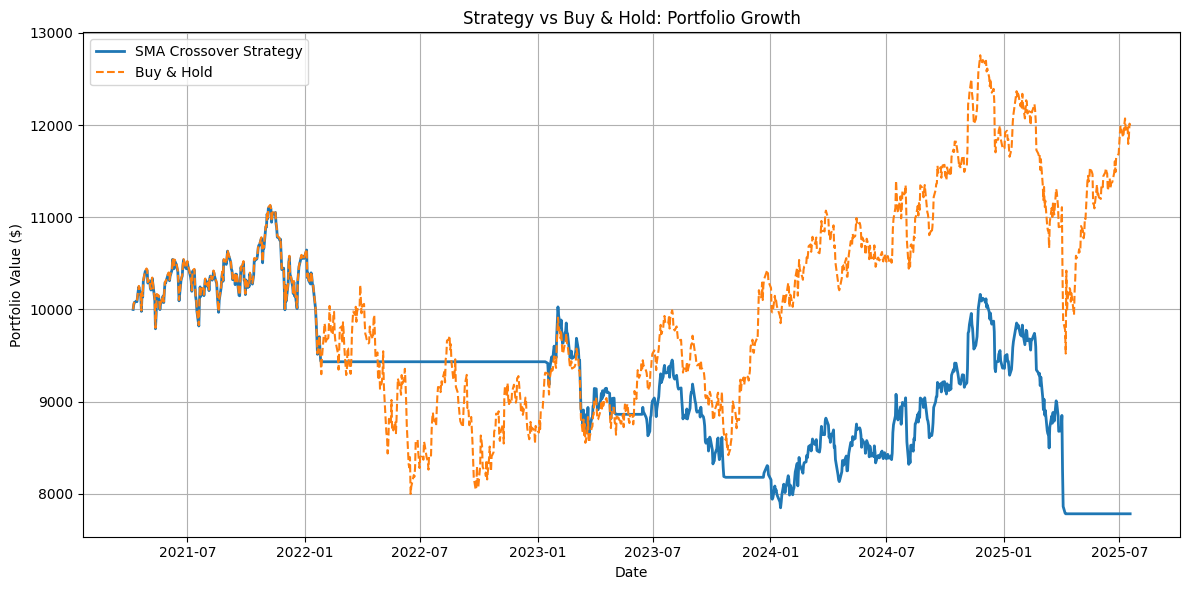

/tmp/ipython-input-5-2519254297.py:16: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(ticker, start=start.strftime('%Y-%m-%d'), end=end.strftime('%Y-%m-%d'))
[*********************100%***********************]  1 of 1 completed



Analyzing META...



==== Performance Report ====

Total Return (Strategy):                               255.42%
Total Return (Buy & Hold):                             126.18%
CAGR (Compound Annual Growth Rate):                    34.58%
Annualized Volatility (std(R)*sqrt(trading_days=252)): 28.87%
Sharpe Ratio (mean(R)-R_f / std(R)):                   1.17
Max Drawdown (min(Portfolio / Running_Max - 1)):       -34.15%




Analyzing MSFT...



/tmp/ipython-input-5-2519254297.py:16: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(ticker, start=start.strftime('%Y-%m-%d'), end=end.strftime('%Y-%m-%d'))
[*********************100%***********************]  1 of 1 completed


==== Performance Report ====

Total Return (Strategy):                               79.01%
Total Return (Buy & Hold):                             111.47%
CAGR (Compound Annual Growth Rate):                    14.61%
Annualized Volatility (std(R)*sqrt(trading_days=252)): 18.36%
Sharpe Ratio (mean(R)-R_f / std(R)):                   0.83
Max Drawdown (min(Portfolio / Running_Max - 1)):       -19.54%




Analyzing GS...



/tmp/ipython-input-5-2519254297.py:16: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(ticker, start=start.strftime('%Y-%m-%d'), end=end.strftime('%Y-%m-%d'))
[*********************100%***********************]  1 of 1 completed


==== Performance Report ====

Total Return (Strategy):                               64.30%
Total Return (Buy & Hold):                             140.80%
CAGR (Compound Annual Growth Rate):                    12.33%
Annualized Volatility (std(R)*sqrt(trading_days=252)): 23.04%
Sharpe Ratio (mean(R)-R_f / std(R)):                   0.62
Max Drawdown (min(Portfolio / Running_Max - 1)):       -30.90%




Analyzing BLK...



/tmp/ipython-input-5-2519254297.py:16: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(ticker, start=start.strftime('%Y-%m-%d'), end=end.strftime('%Y-%m-%d'))
[*********************100%***********************]  1 of 1 completed


==== Performance Report ====

Total Return (Strategy):                               2.73%
Total Return (Buy & Hold):                             55.47%
CAGR (Compound Annual Growth Rate):                    0.63%
Annualized Volatility (std(R)*sqrt(trading_days=252)): 18.80%
Sharpe Ratio (mean(R)-R_f / std(R)):                   0.13
Max Drawdown (min(Portfolio / Running_Max - 1)):       -33.11%




Analyzing JPM...



/tmp/ipython-input-5-2519254297.py:16: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(ticker, start=start.strftime('%Y-%m-%d'), end=end.strftime('%Y-%m-%d'))
[*********************100%***********************]  1 of 1 completed


==== Performance Report ====

Total Return (Strategy):                               128.61%
Total Return (Buy & Hold):                             110.26%
CAGR (Compound Annual Growth Rate):                    21.37%
Annualized Volatility (std(R)*sqrt(trading_days=252)): 20.75%
Sharpe Ratio (mean(R)-R_f / std(R)):                   1.04
Max Drawdown (min(Portfolio / Running_Max - 1)):       -24.42%


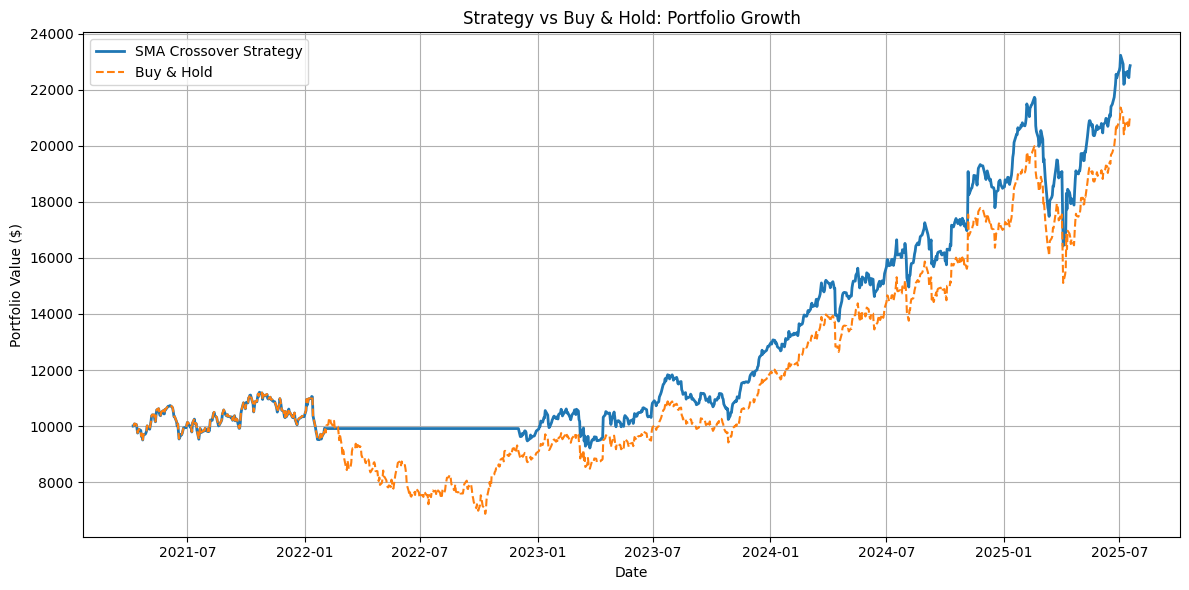

In [6]:
# === INPUT YOUR STOCK TICKERS HERE ===
tickers = ['QQQ', 'VOO', 'DIA', 'BRK-B', 'TQQQ', 'AMZN', 'TSLA', 'VTI', 'NVDA', 'GOOG', 'AAPL', 'QBIG', 'VB', 'META', 'MSFT', 'GS', 'BLK', 'JPM']  # ← Add or remove tickers here

for ticker in tickers:
    run_quant_pipeline(ticker)